# ❓ <font color='green'> <u> PROBLEM STATEMENT (Logistic Regression_Bank_Data) </u>

### Here we are provided with Bank's Client Data  from Marketing Department. 
### We are expected to Predict Correctly the Potential Customer who will likely to subscribe for term deposit with the information provided in different attributes.
 
- #### Attribute information For bank dataset:

- ##### Input variables:

* <font color='blue'>bank client data:
 - age (numeric)
 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 - education (categorical: "unknown","secondary","primary","tertiary")
 - default: has credit in default? (binary: "yes","no")
 - balance: average yearly balance, in euros (numeric) 
 - housing: has housing loan? (binary: "yes","no")
 - loan: has personal loan? (binary: "yes","no")
   
* <font color='blue'>related with the last contact of the current campaign:
 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
 - day: last contact day of the month (numeric)
 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 - duration: last contact duration, in seconds (numeric)
* <font color='blue'>other attributes:
 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means                   client was not previously contacted)
 - previous: number of contacts performed before this campaign and for this client (numeric)
 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

* <font color='blue'>Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: "yes","no")

* <font color='blue'>Missing Attribute Values: None

 

 > ###  Understanding after data overlook:
 > #### There is mension of campaign of cold-calling marketing, clients are contacted through "telephone","cellular" and "unknown" category, contact duration is also given, most probabaly data is about tele-calling marketing. 
> #### Here to increse the profit and efficiency we need to predict client who going to subscribe term deposit correctly. Our focus should be on True Positive class i.e. percentage of correct prediction should be high and percentage of Falsely predicted Positive class should be low.
> #### Also the attribute call duration have high impact on our target column. (call duration = 0 implies there were no communication happen). 
> #### Additionally average yearly balance and loan attributes could be the major predictors in our analysis. 
> #### Given that there are no missing values in dataset.

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid', palette='pastel')

* ### <font color = 'blue'> <u> READ DATA </u>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets/main/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Rename the Target column
df.rename(columns= {'y':'Target'}, inplace= True)
df.head(0)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


***

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> * ##### There are 45211 records with 17 variables. Out of which 7 are numerical and 10 are categorical data-type.
> * ##### Data types of all the variables are proper.
> * #####  Given that there is no missing value still with "non-null count" attribute we can confirm it.

* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
(df[df['pdays'] == -1]).shape[0]

36954

> * ##### Variable "pdays" are the number of days that passed by after the client was last contacted from a previous campaign. Minimum, 25%, 50%, 75% all values are -1 means majority of client(36954) was not previously contacted. 

In [8]:
(df[df['previous'] == 0]).shape[0]

36954

> * ##### Same the case for "previous" is the number of contacts performed before this campaign whole inter-quartile range represent zero this means majority of clients(36954) are not contacted before this campaign.

In [9]:
(df[df['balance'] < 0]).shape[0]

3766

> * #####  Minimun value for balance is negative means some clients(3766) have more expences than income (like credit card use).

* ##### <font color ='green'><u> Checking for Duplicate Records and Removing if any </u>

In [10]:
df.duplicated().sum()

0

> * ##### Not found any duplicated record.

* ##### <font color ='green'><u> Let's Check For Unique Values for Categorical Variables </u>

In [11]:
categorical_col = (df.select_dtypes(object)).columns
for i in categorical_col:
    print(f"Number of unique values for ", i,"= ", df[i].nunique())
    

Number of unique values for  job =  12
Number of unique values for  marital =  3
Number of unique values for  education =  4
Number of unique values for  default =  2
Number of unique values for  housing =  2
Number of unique values for  loan =  2
Number of unique values for  contact =  3
Number of unique values for  month =  12
Number of unique values for  poutcome =  4
Number of unique values for  Target =  2


> * ##### There are 10 Categorical columns with differtent unique values, we going to encode them for model building later on.

***

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

* ##### <font color ='green'><u> Histogram for Numerical Variables with respect to Target Variable</u>

In [12]:
(df.select_dtypes('number')).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
def plot_hist(num_var):
    sns.histplot(data= df, x= num_var, hue = 'Target')

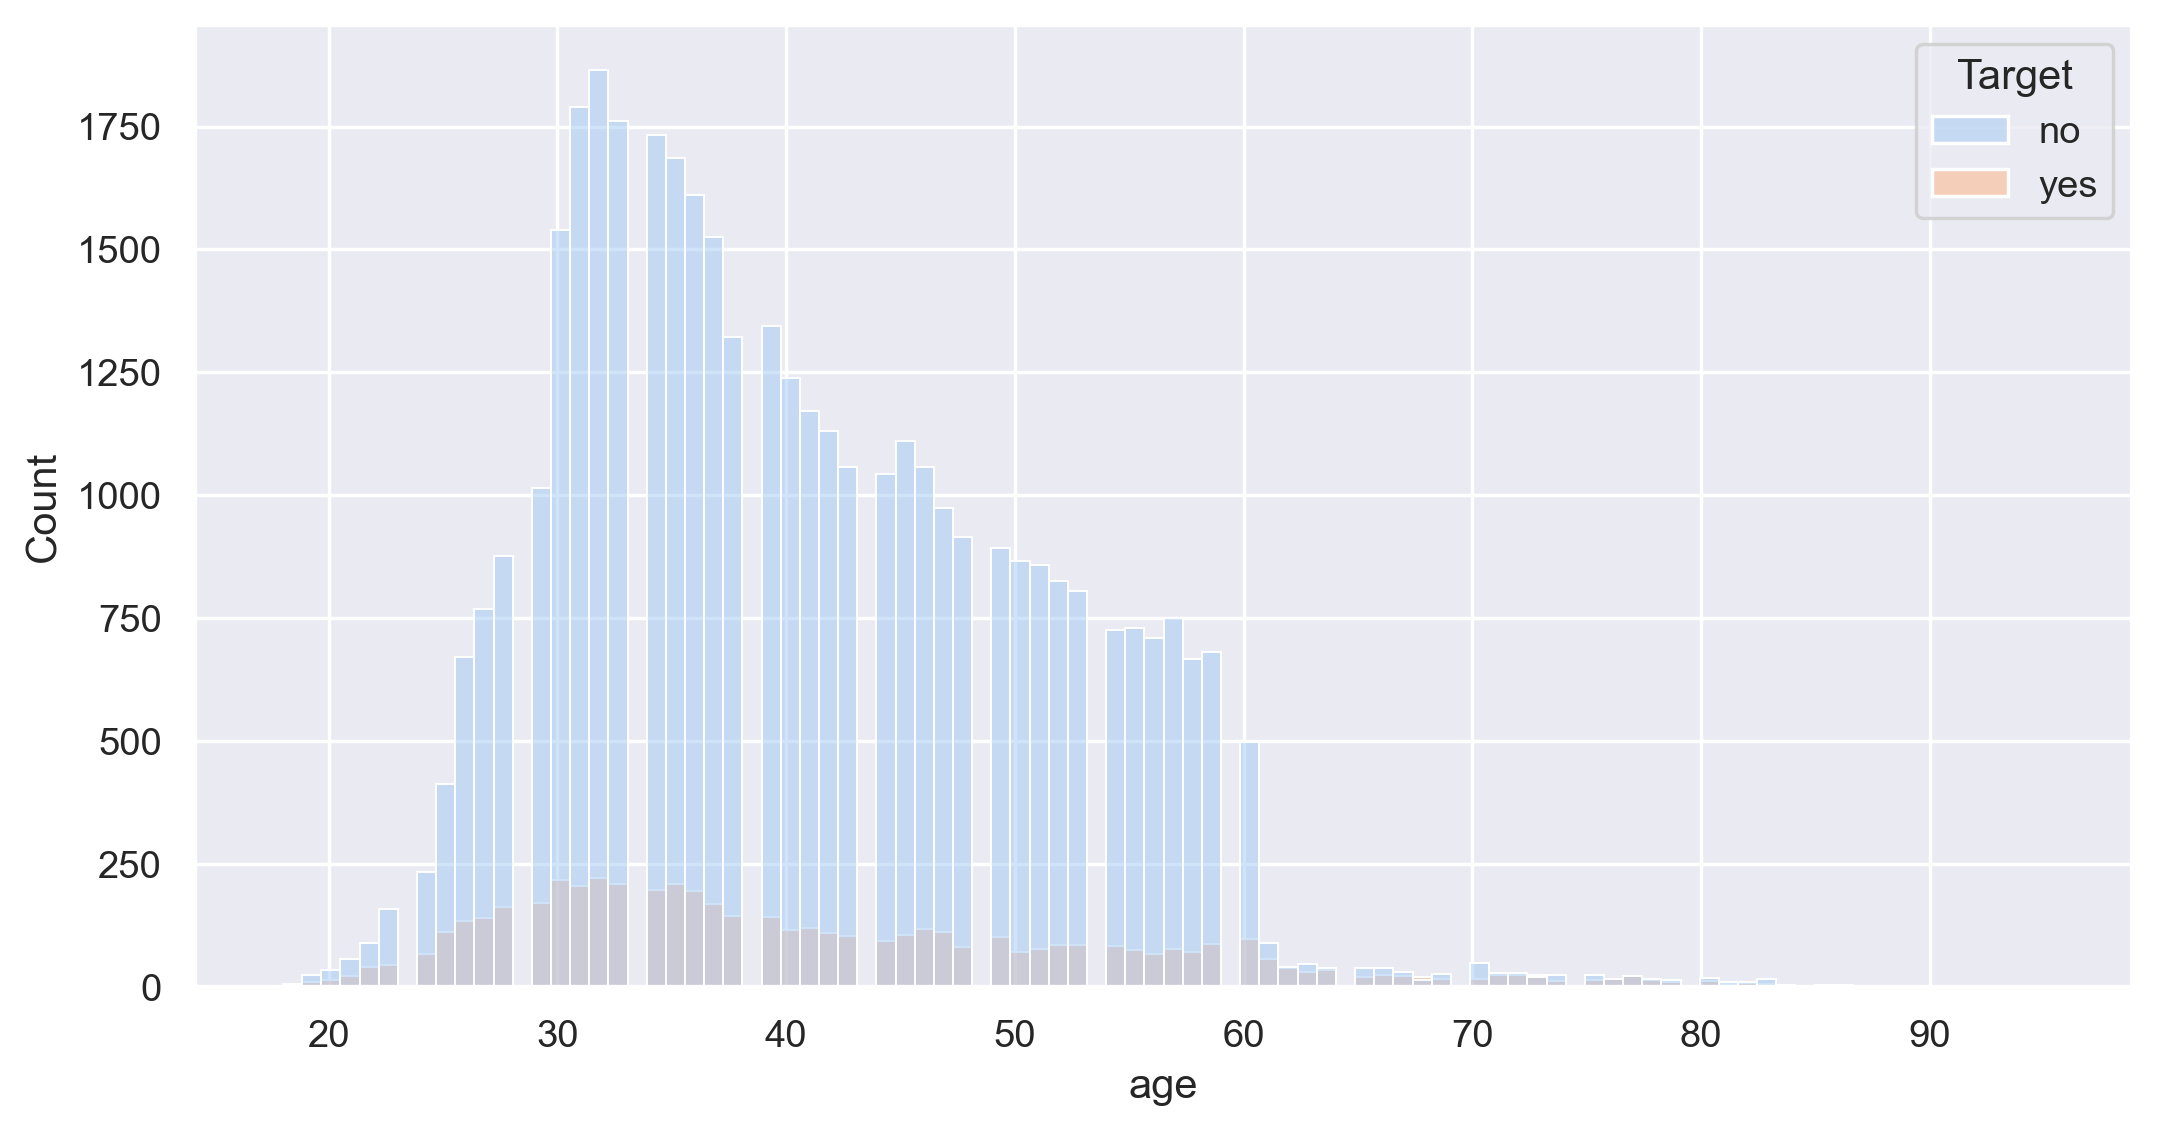

In [14]:
plot_hist('age')

> * #### Middle age group from age 25 to 60 contacted mostly positive responce around 30 age gorup is comparative good.

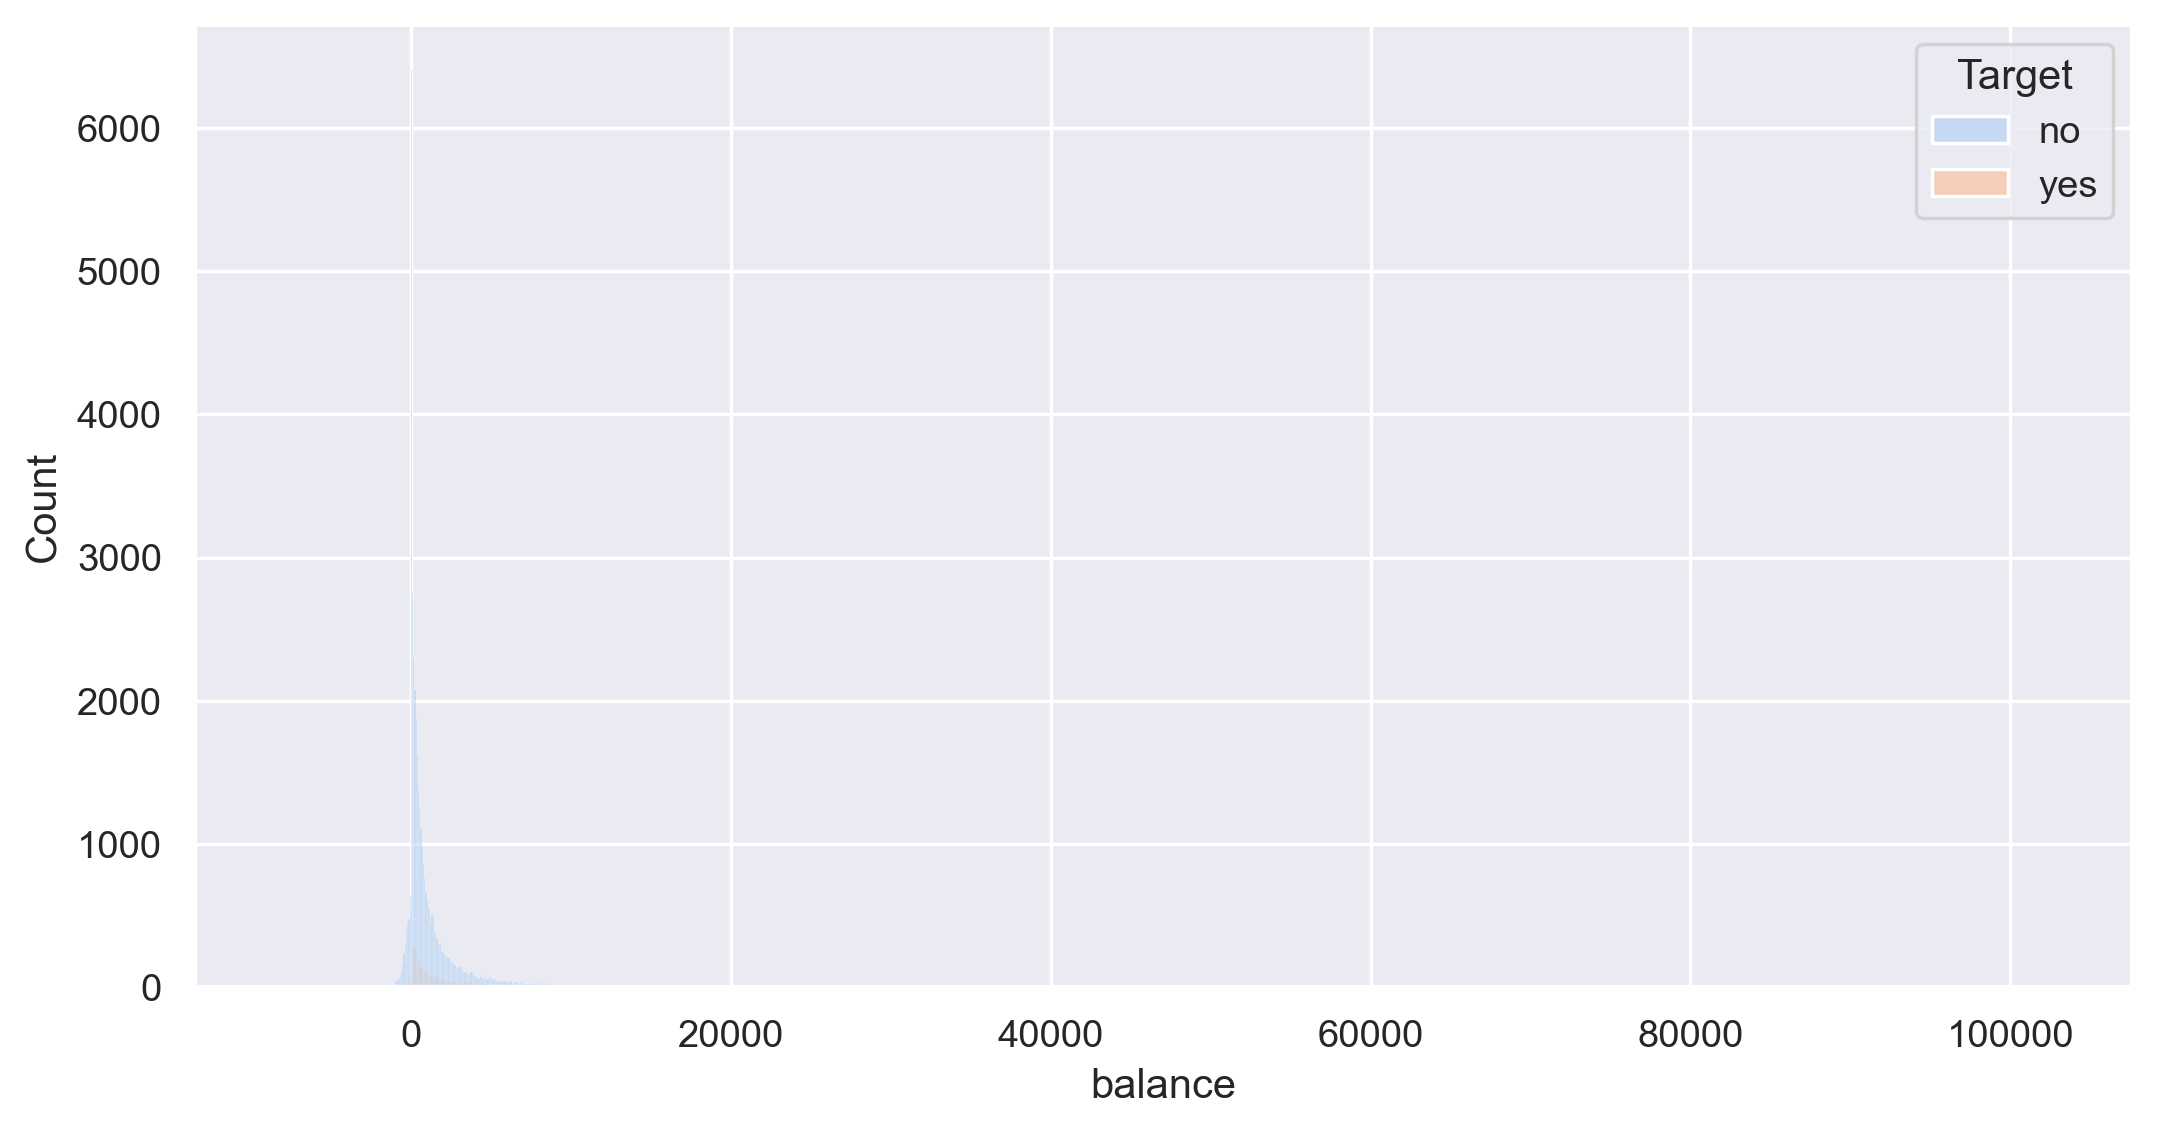

In [15]:
plot_hist('balance')

> * #### We can say 'balance' have some impact on subscription rate.

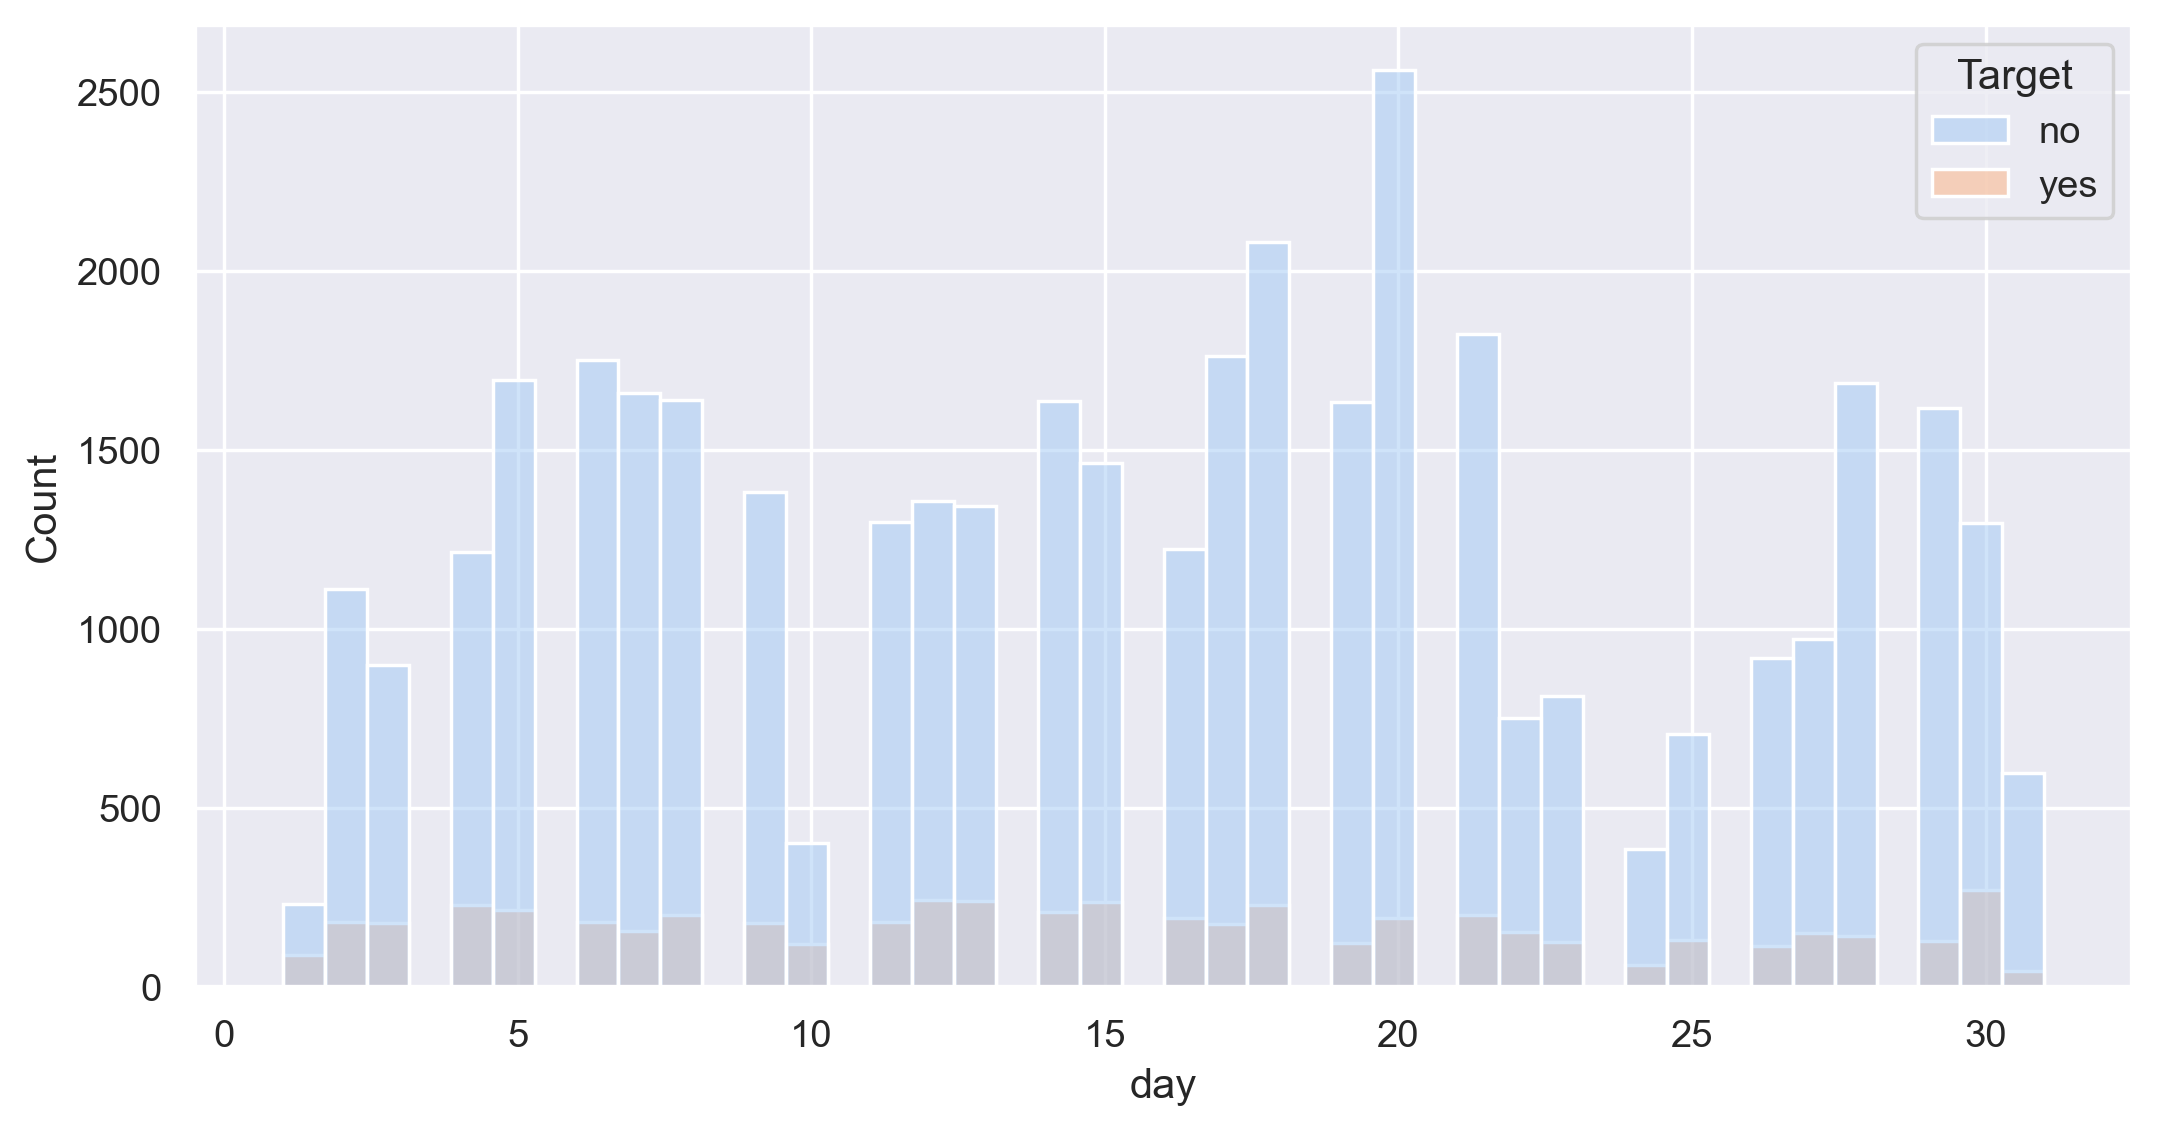

In [16]:
plot_hist('day')

> * #### Day of the Month as such have no impact on Target Variable.

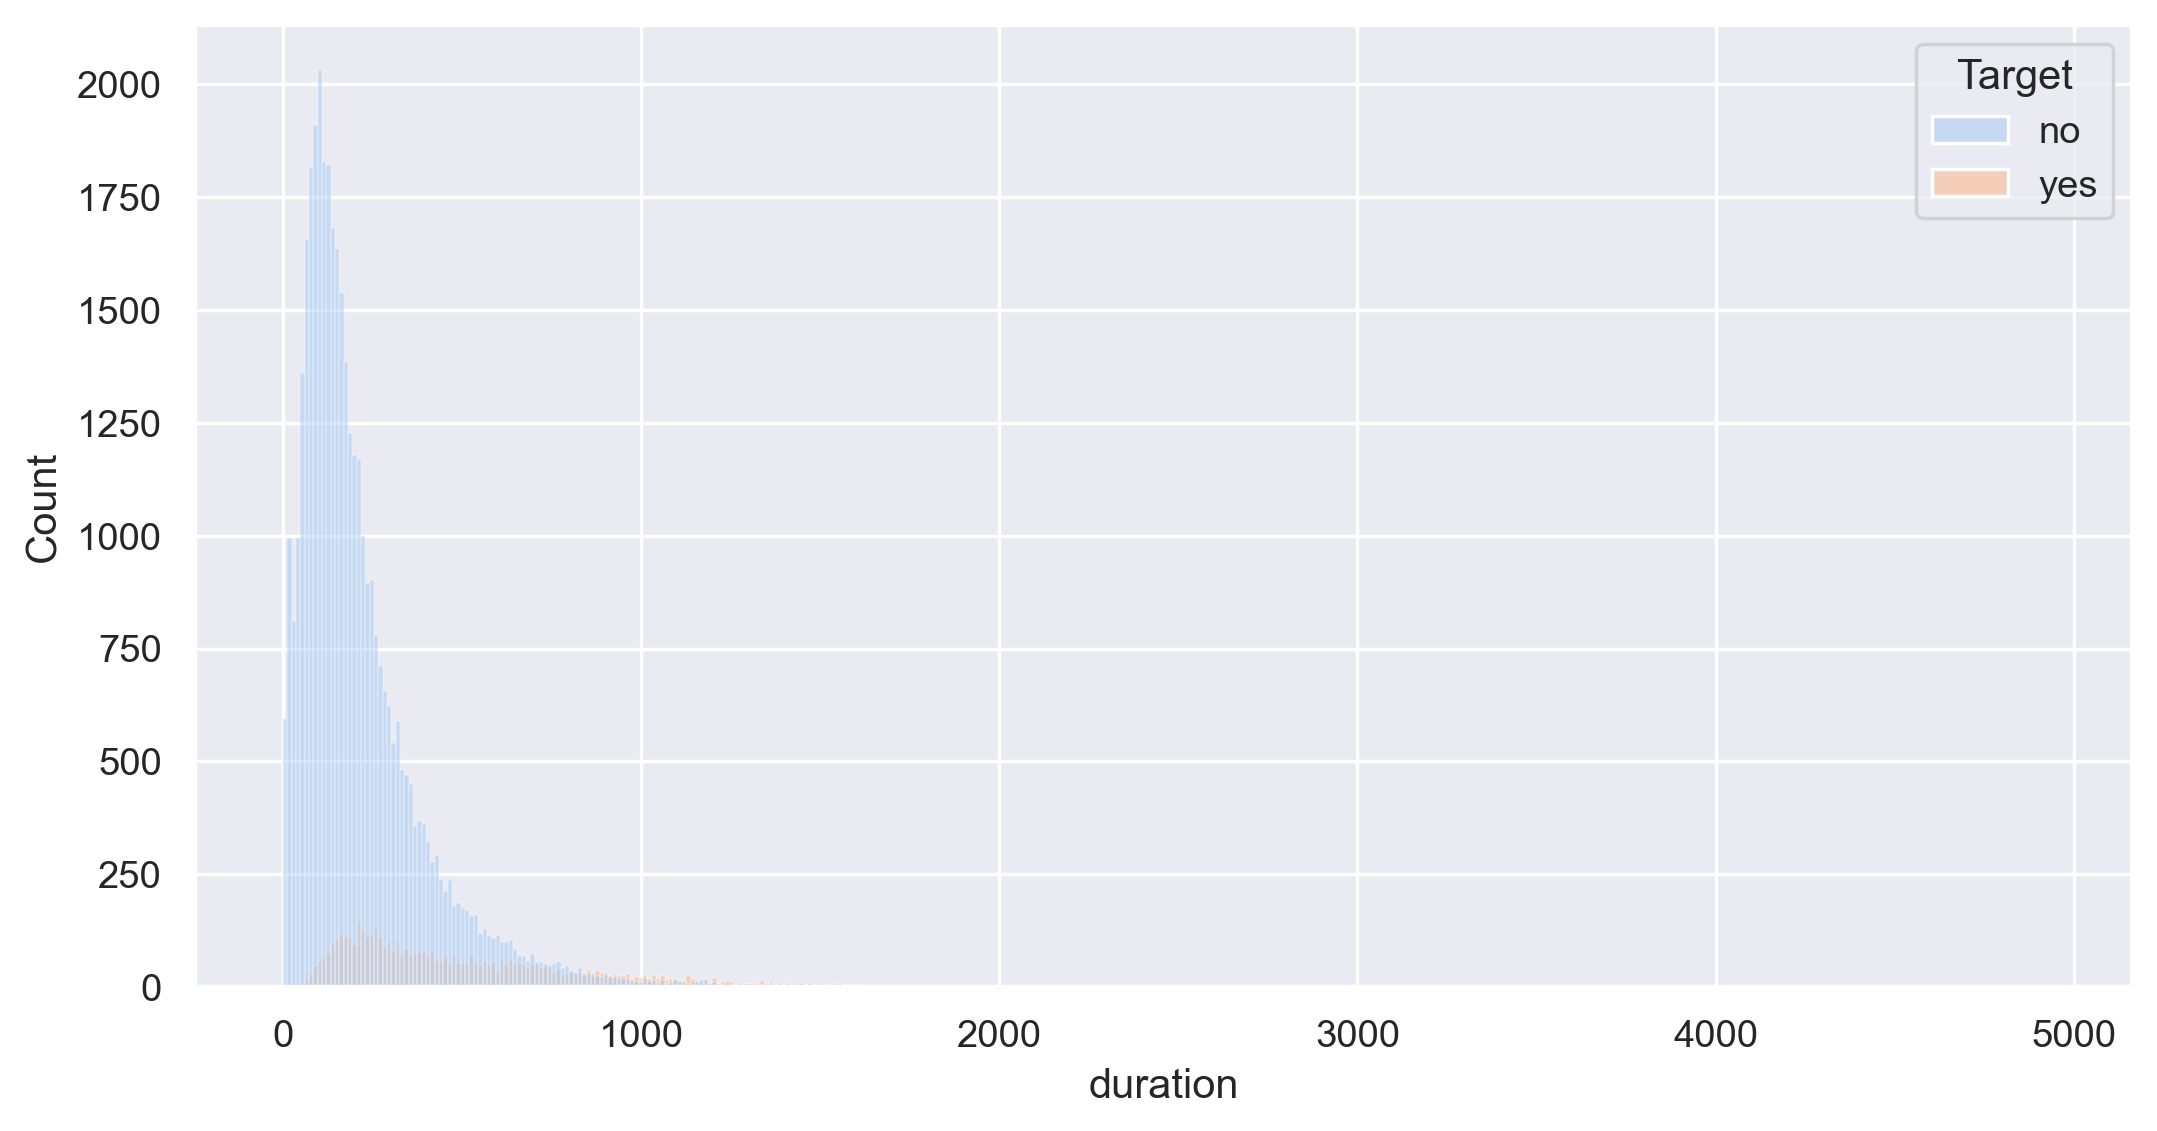

In [17]:
plot_hist('duration')

> * #### Certain amount of Call duration is necessary to get the positive response. 

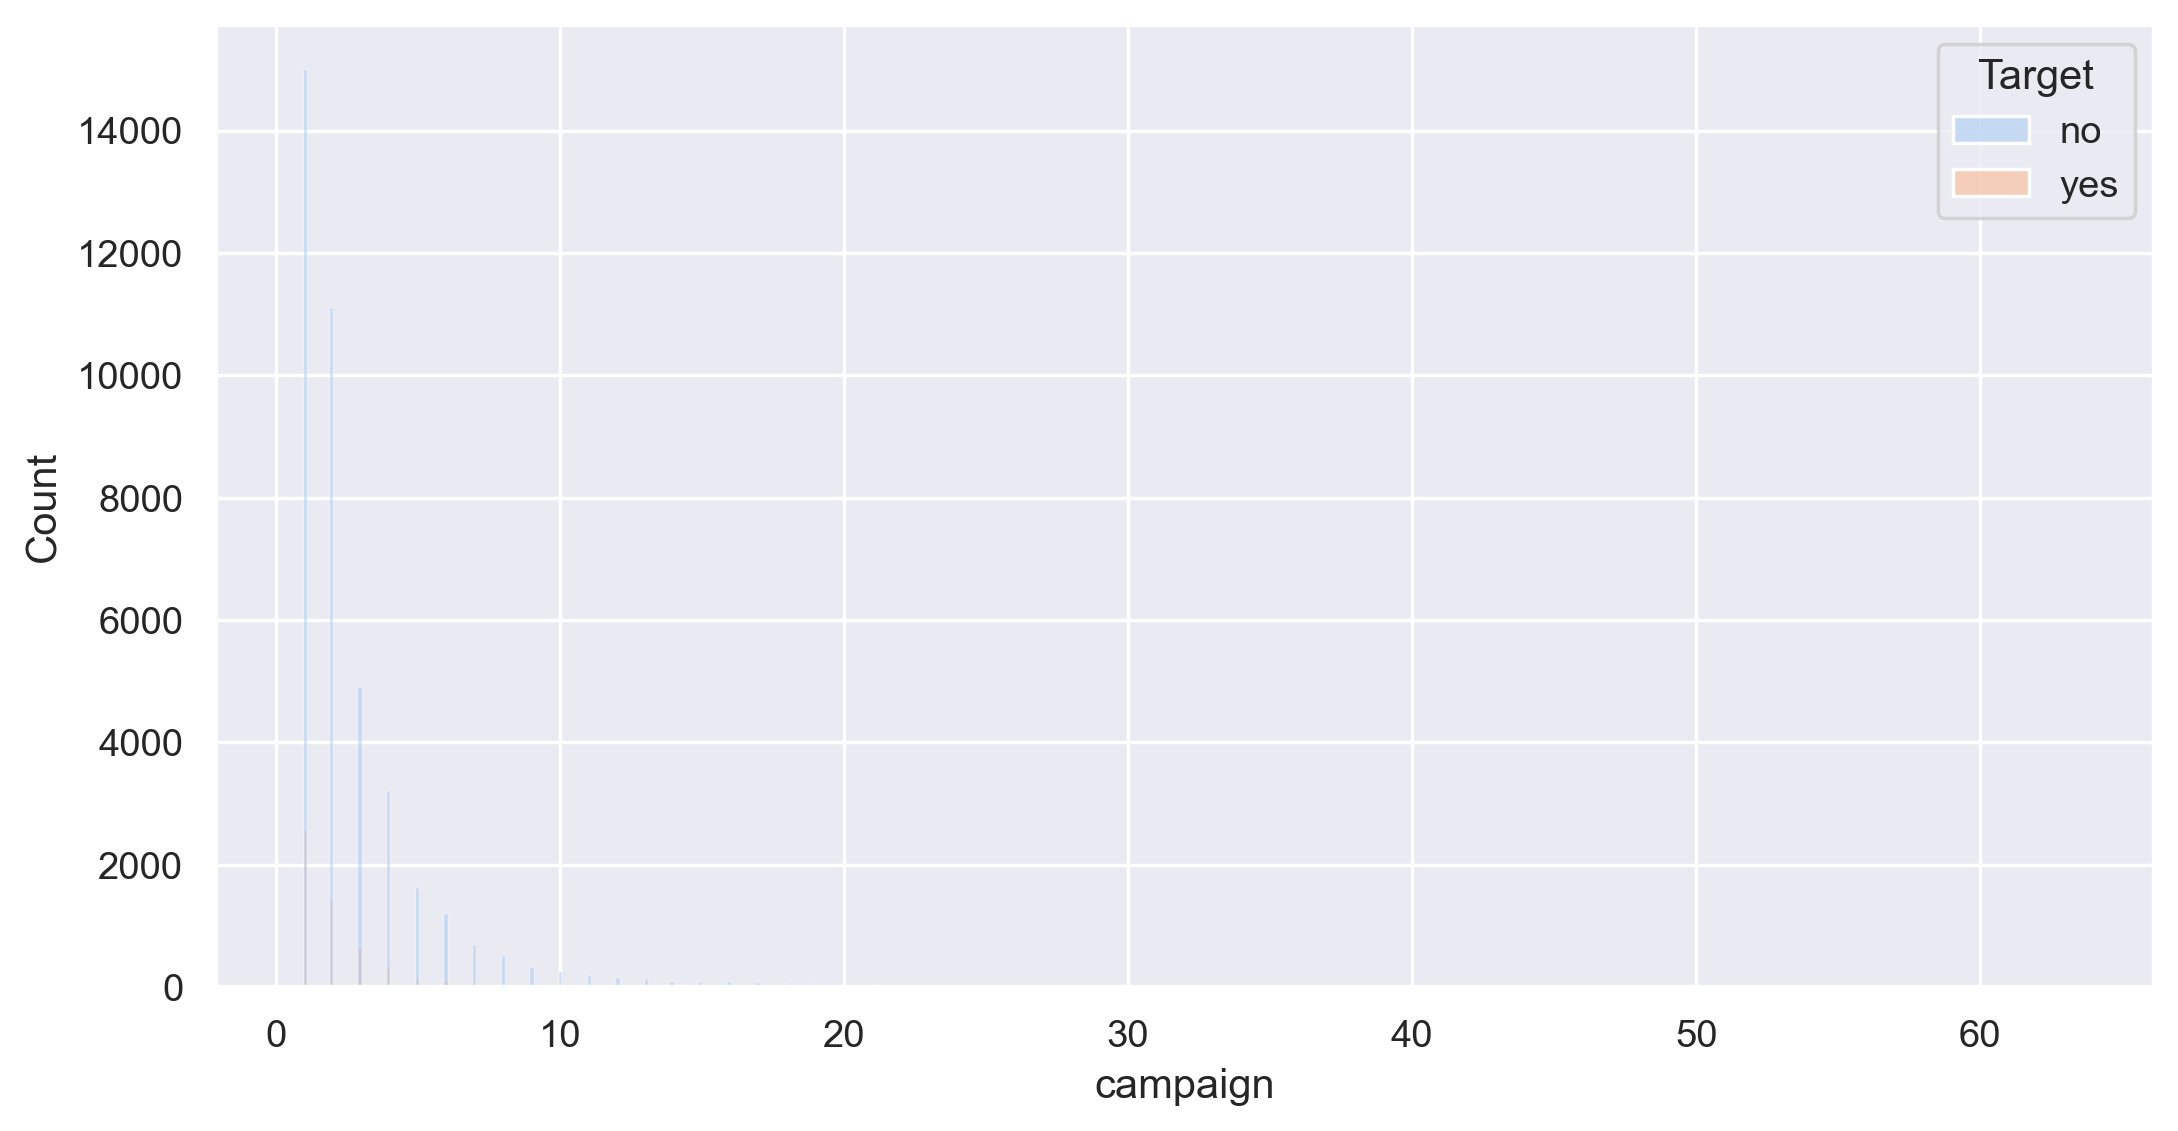

In [18]:
plot_hist('campaign')

> * #### There is no direct relationship such that maximum number of calls results into positive response. 1 to 2 number of calls also have good response.

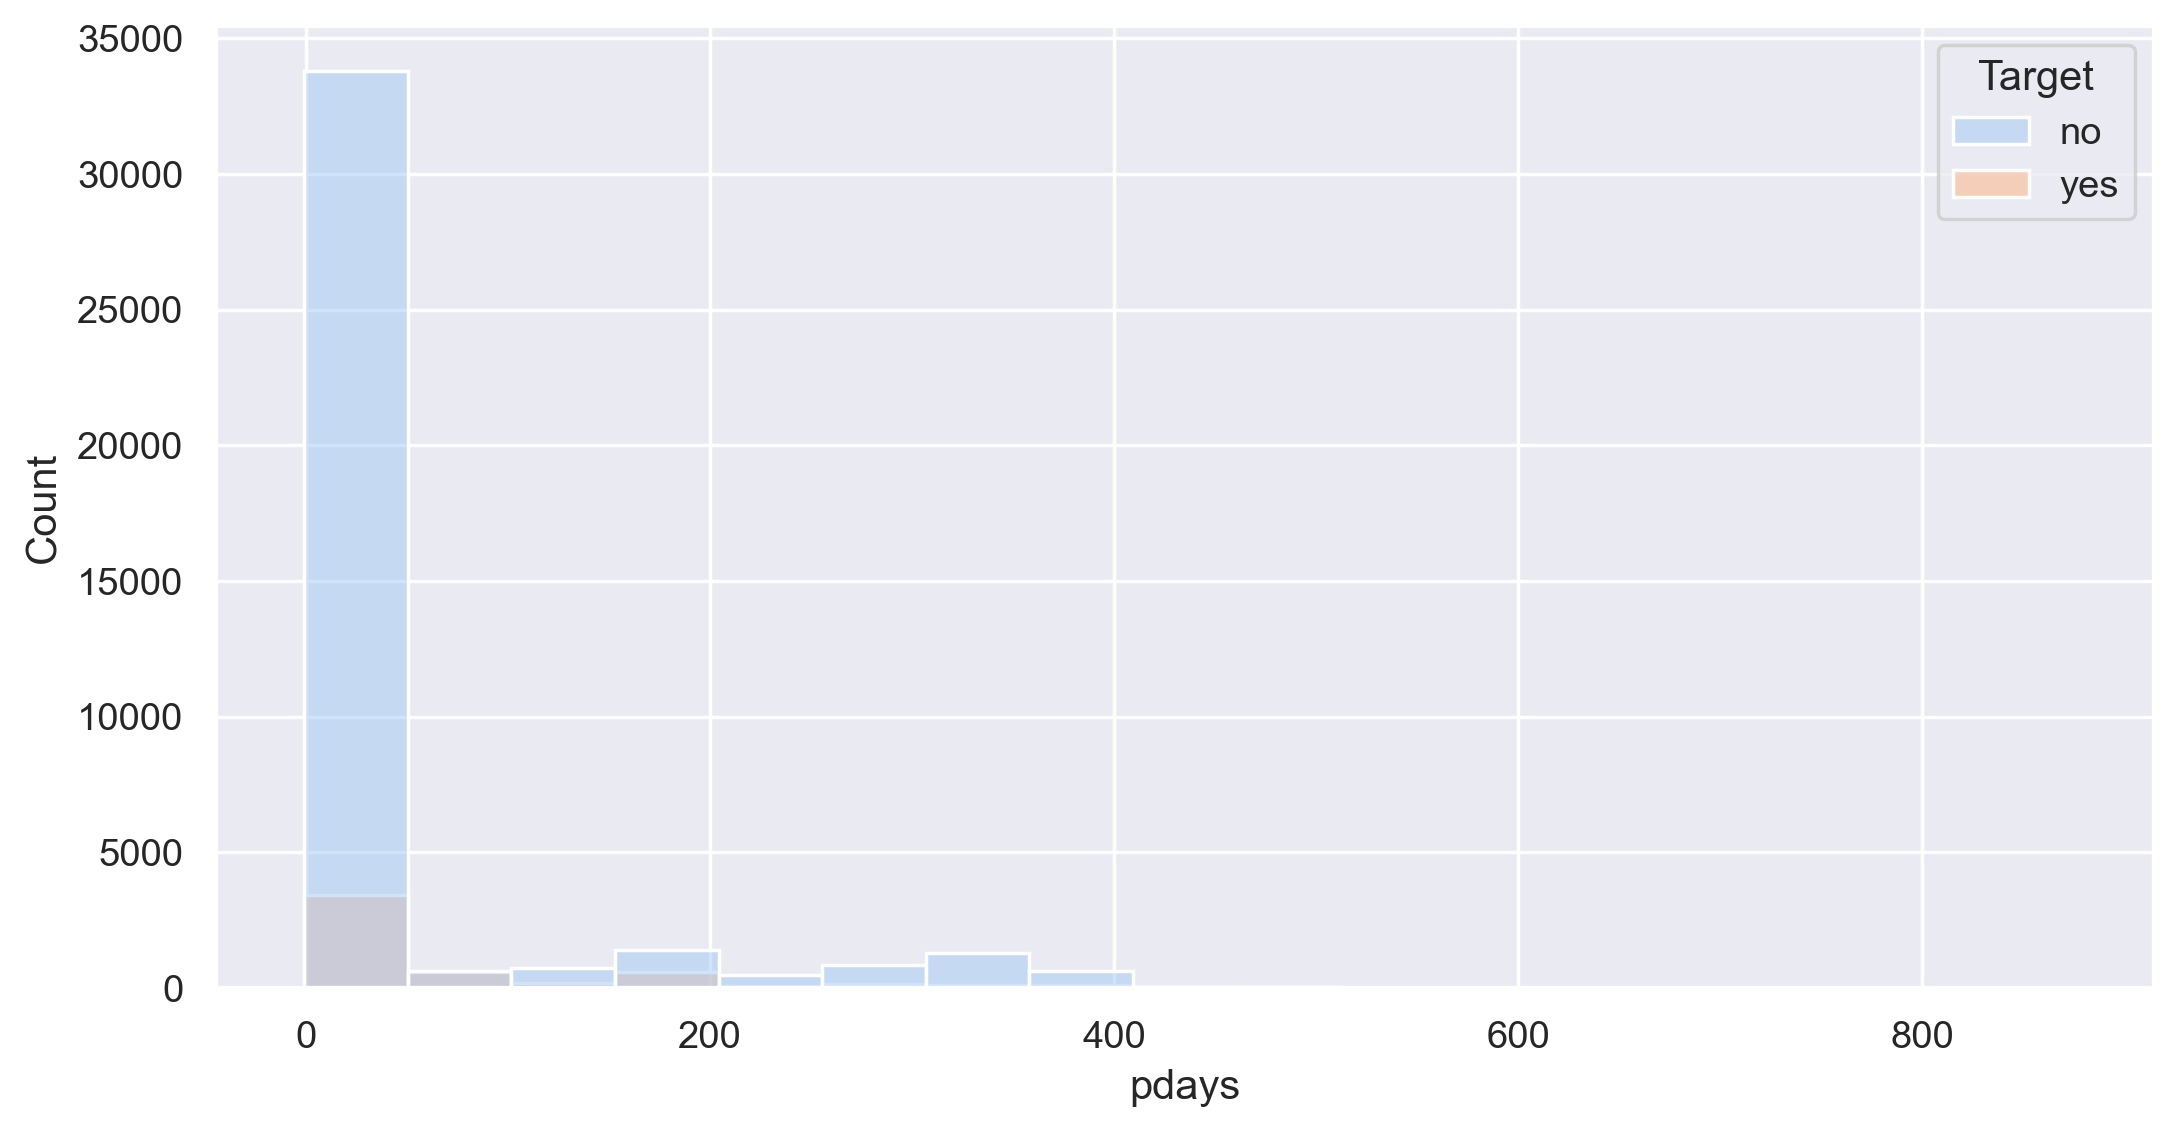

In [19]:
plot_hist('pdays')

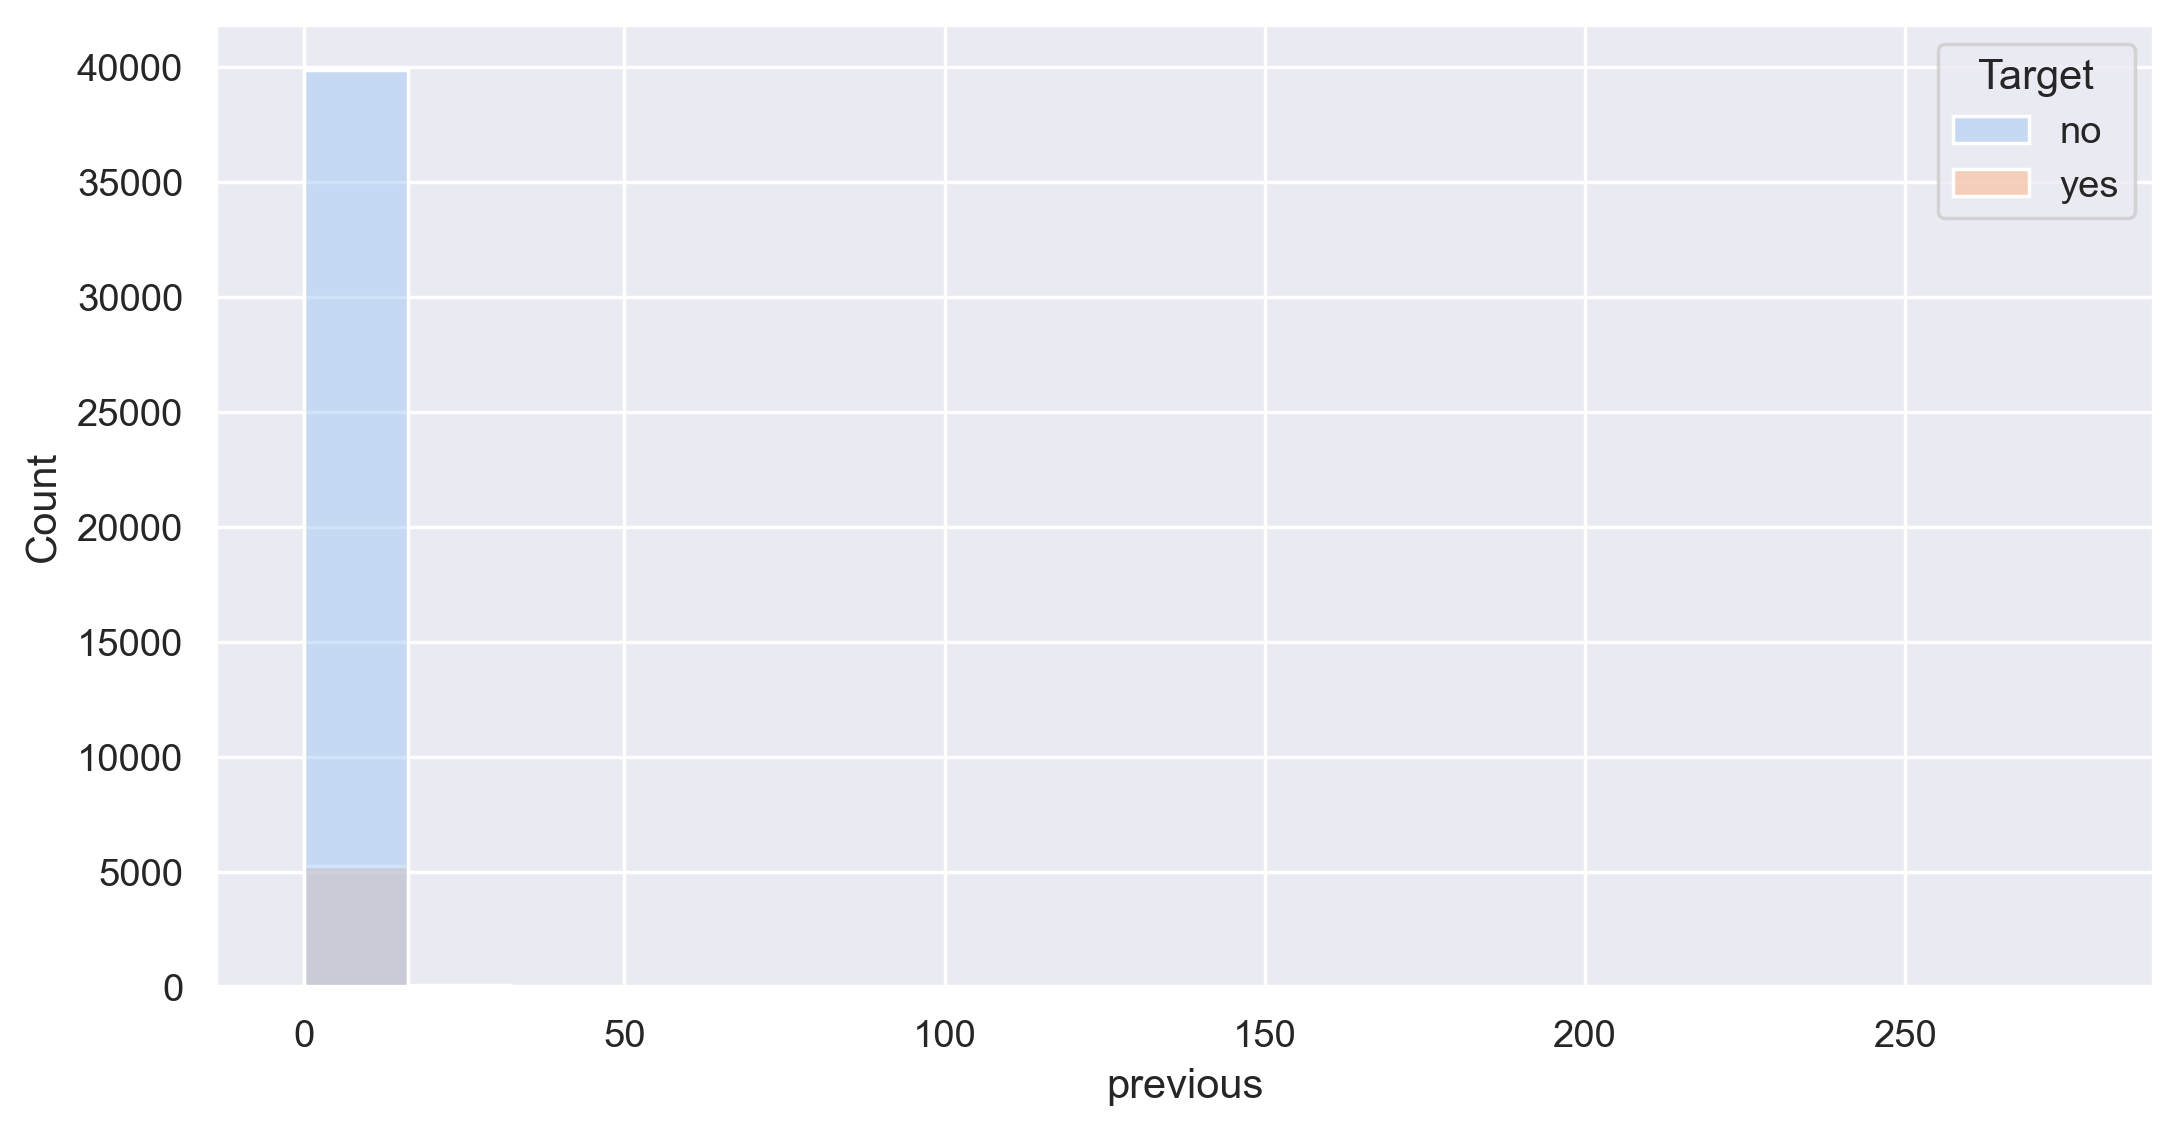

In [20]:
plot_hist('previous')

> * ####  Many clients contacted less number of times before this campaign.  

* ##### <font color ='green'><u> Count plot for Categorical Variables with respect to Target Variable</u>

In [21]:
def plot_count(cate_var):
    (sns.countplot(y = cate_var , data= df, hue='Target'))

In [22]:
(df.select_dtypes('object')).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

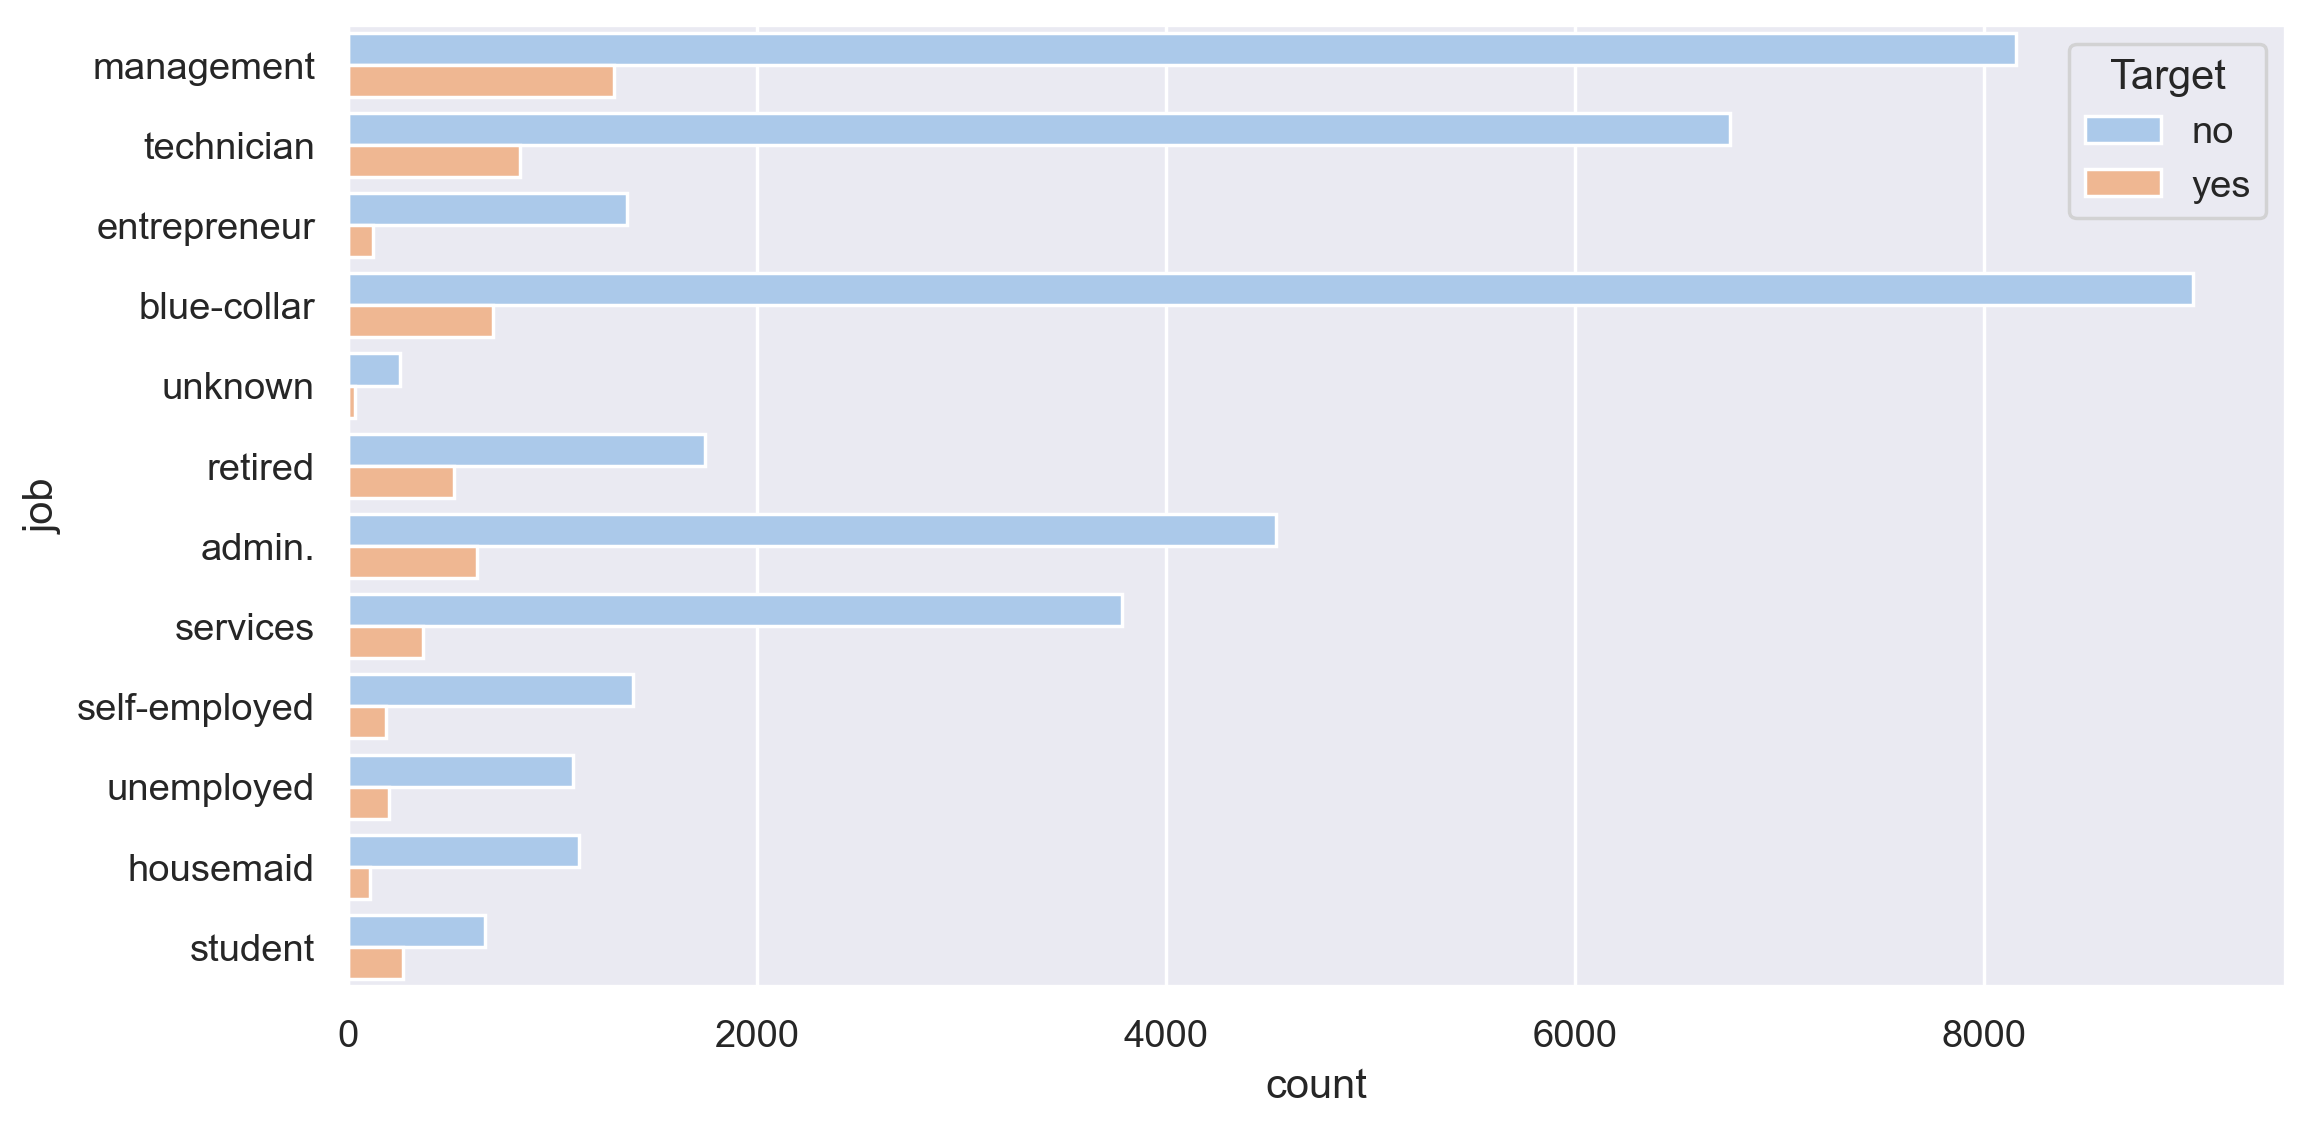

In [23]:
plot_count('job')

> * #### Clients with profession Management, Technician and Blue-collor are most contacted than others. But the success rate is not much good.

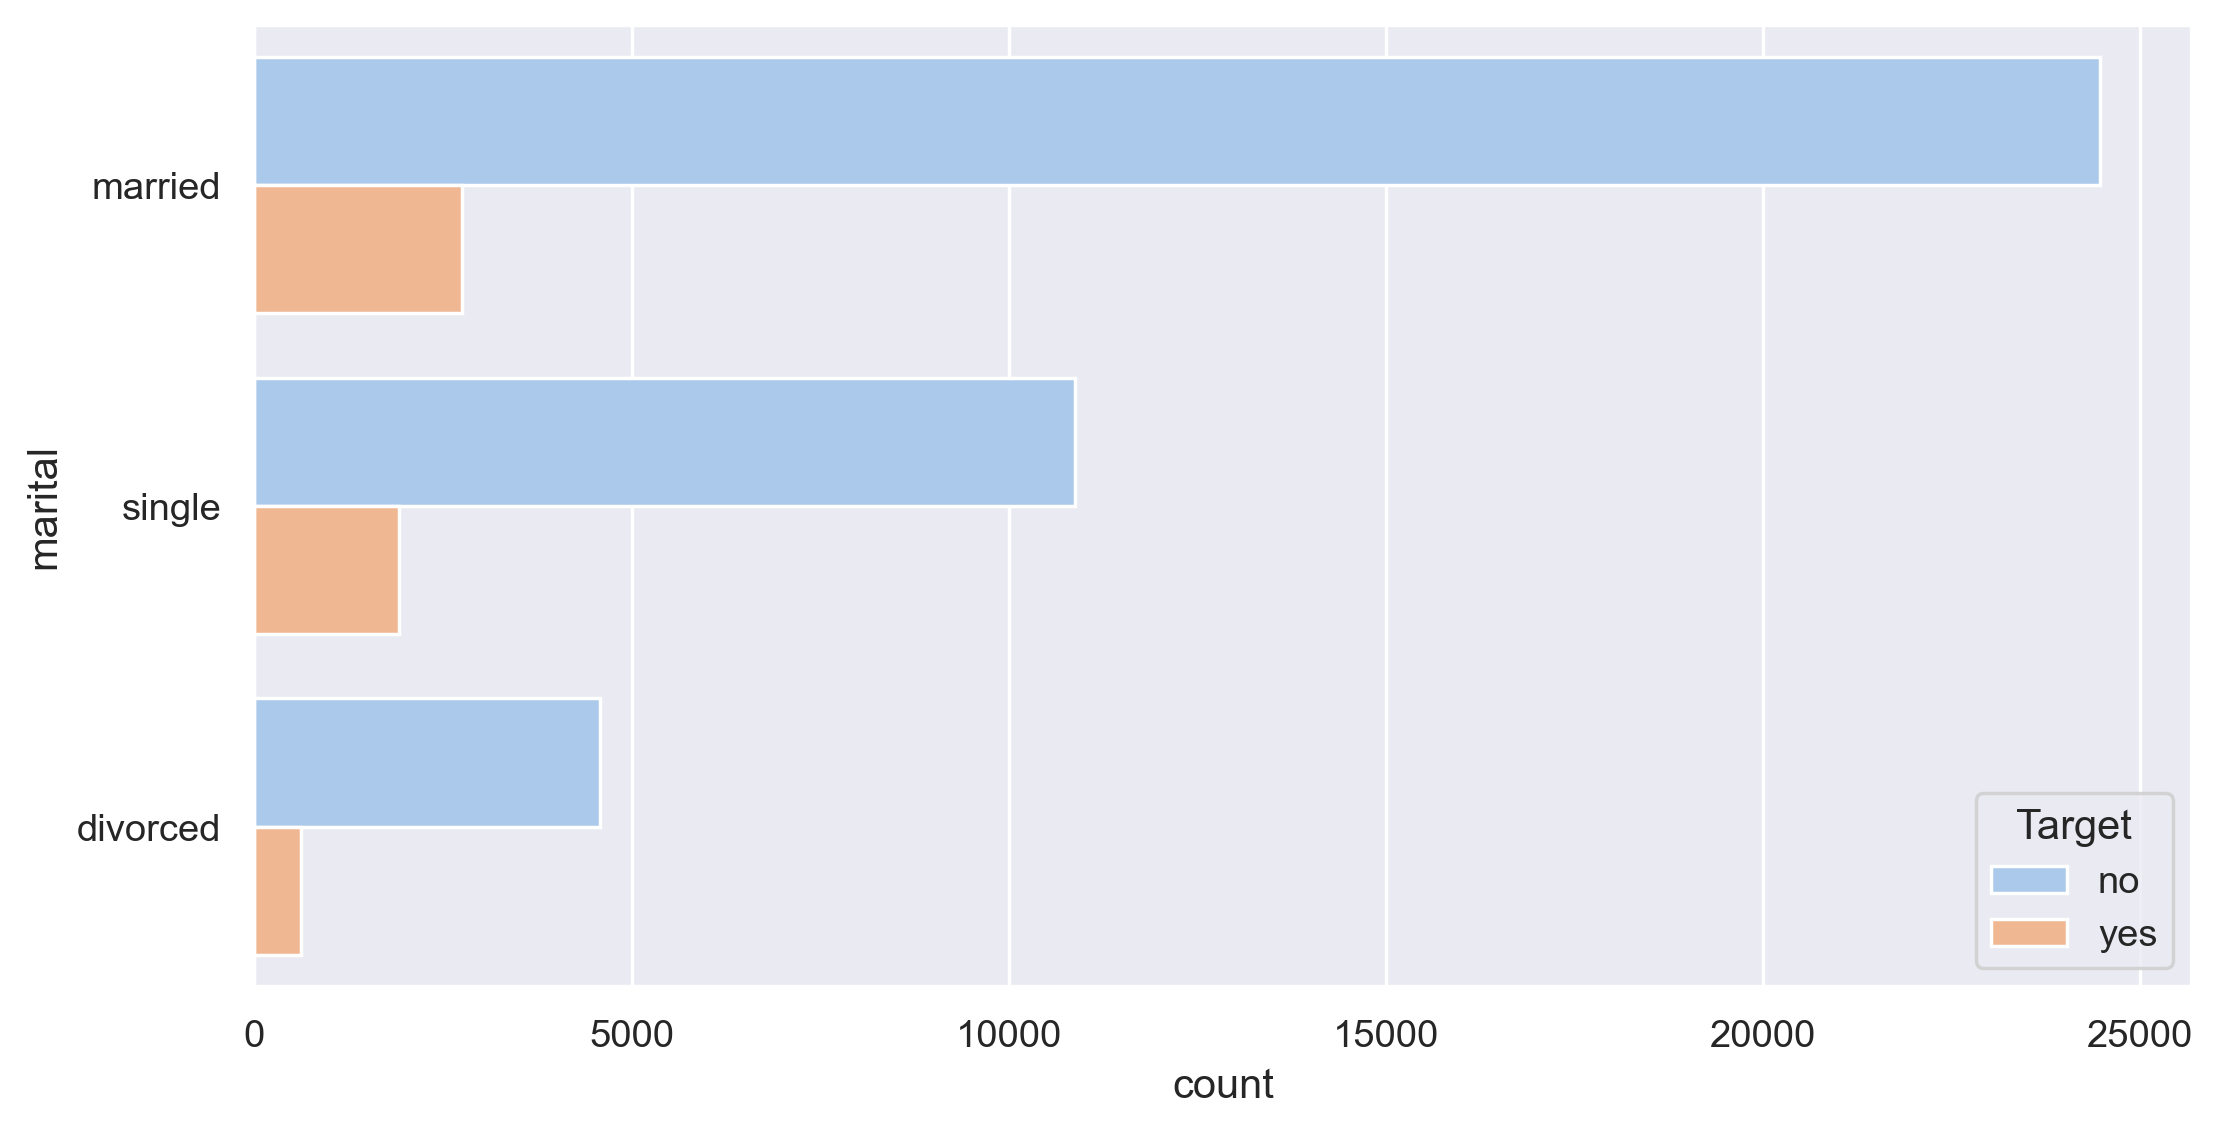

In [24]:
plot_count('marital')

> * #### Responce percentage of Unmarried is much better than responce of married clients 

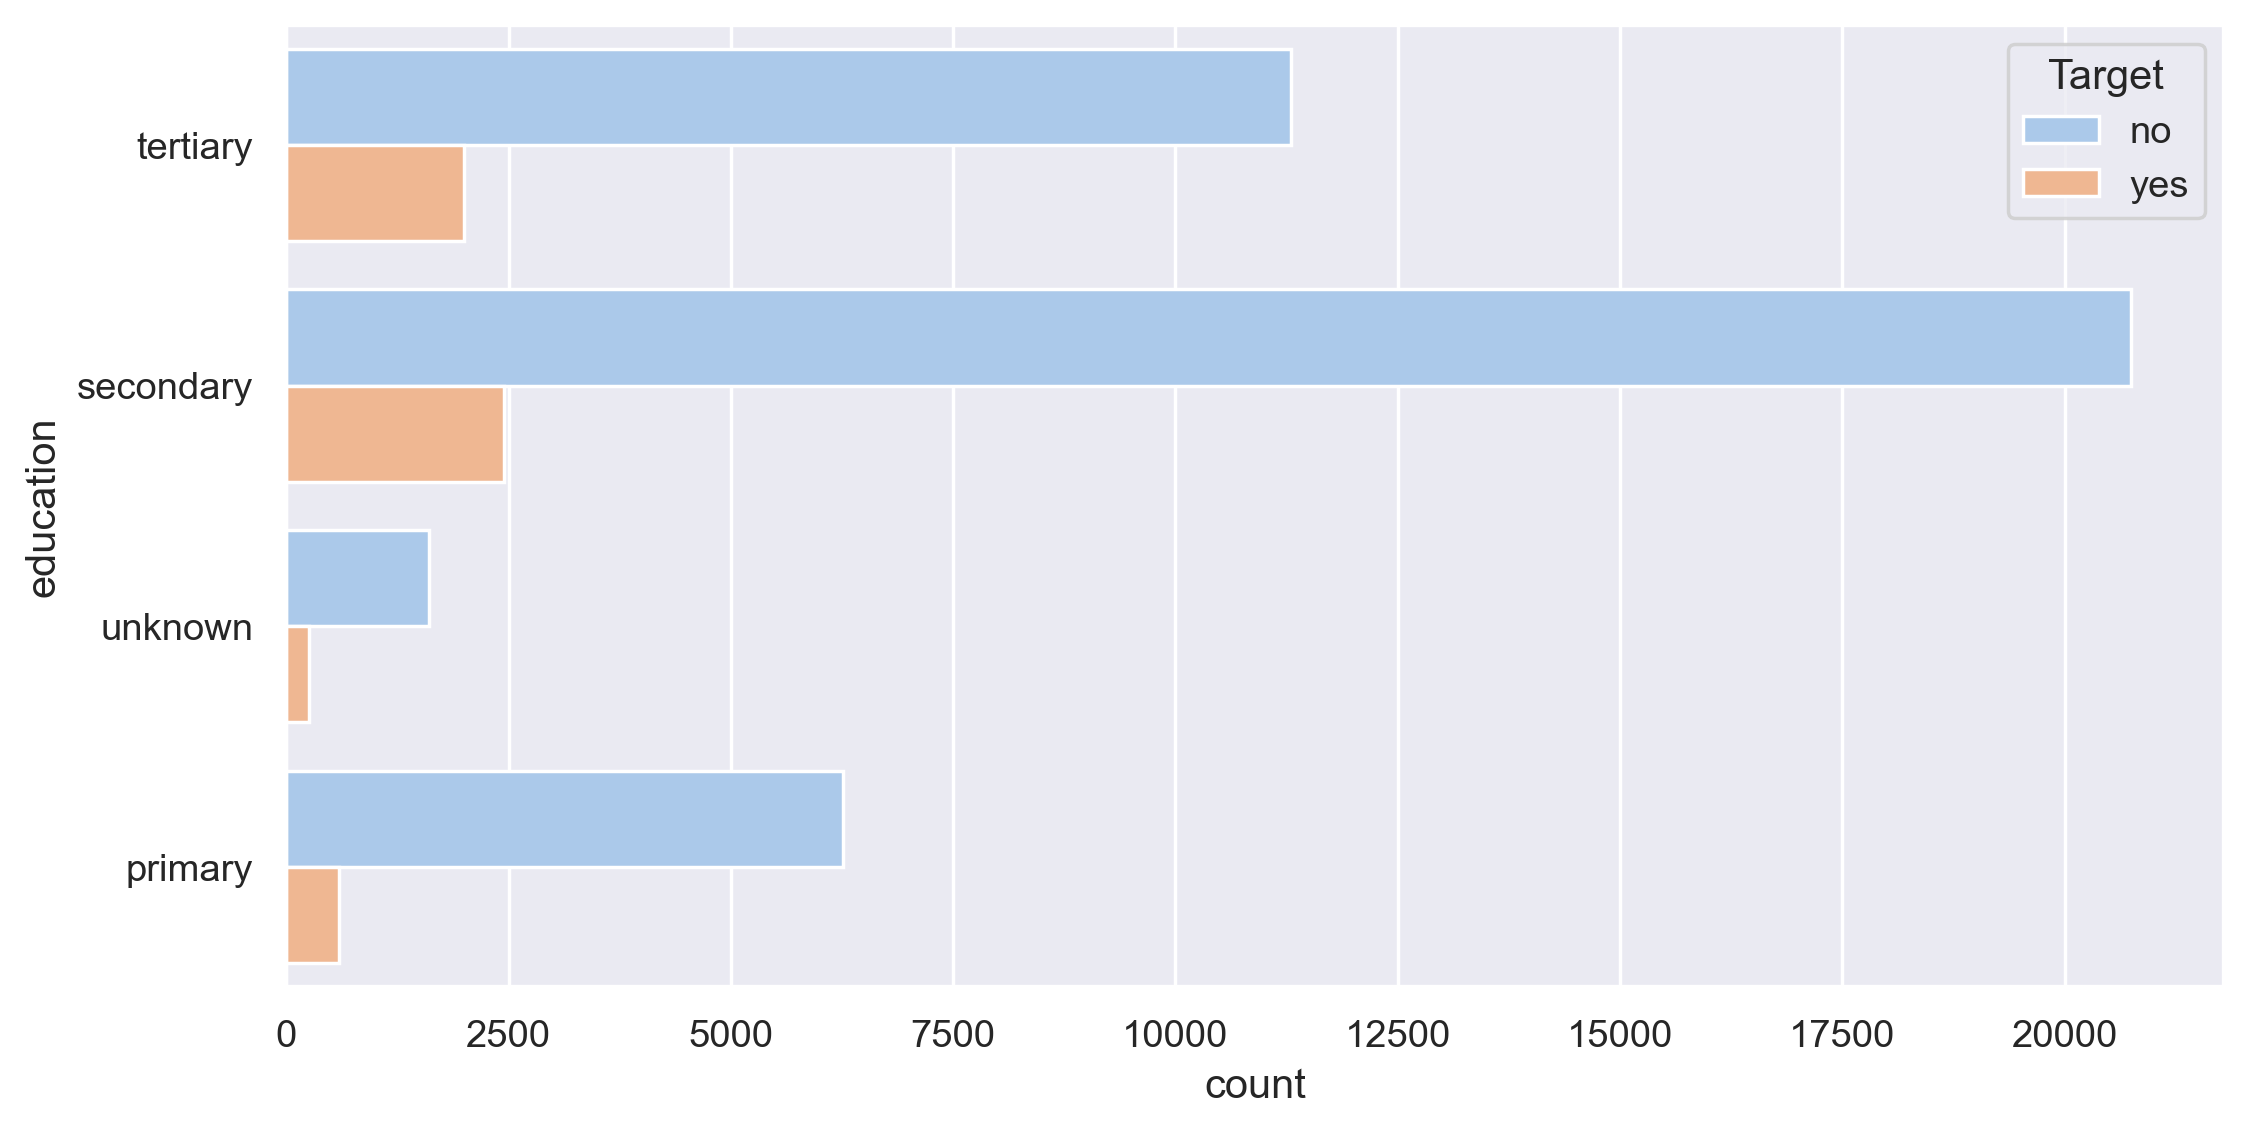

In [25]:
plot_count('education')

> * #### Can't see any direct relation of education with term deposit savings. Such as high education doesn't implies high savings.

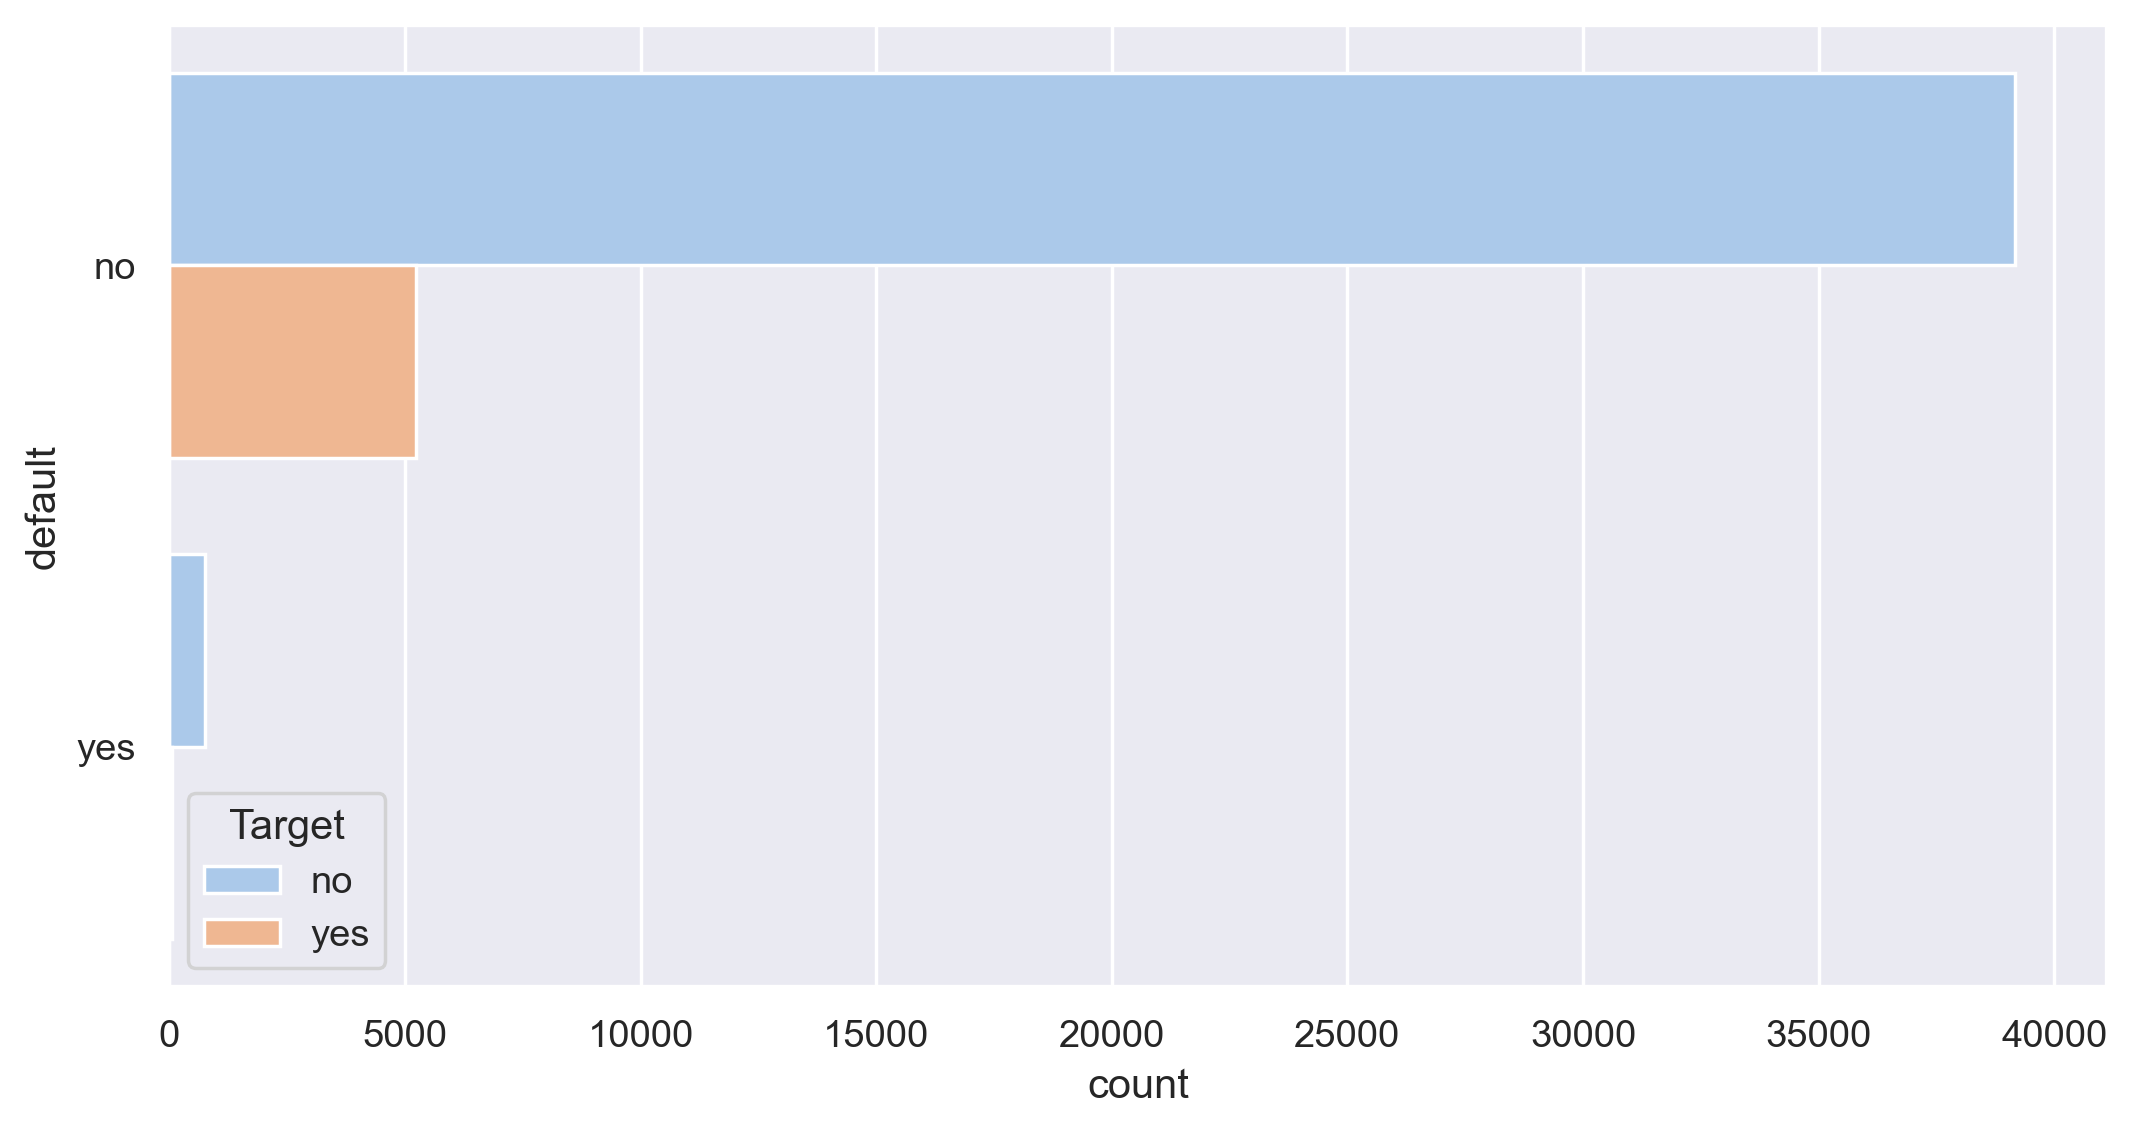

In [26]:
plot_count('default')

> * #### Clients with credit default not at all responded positively. There is no point to consider such client in potential client list.

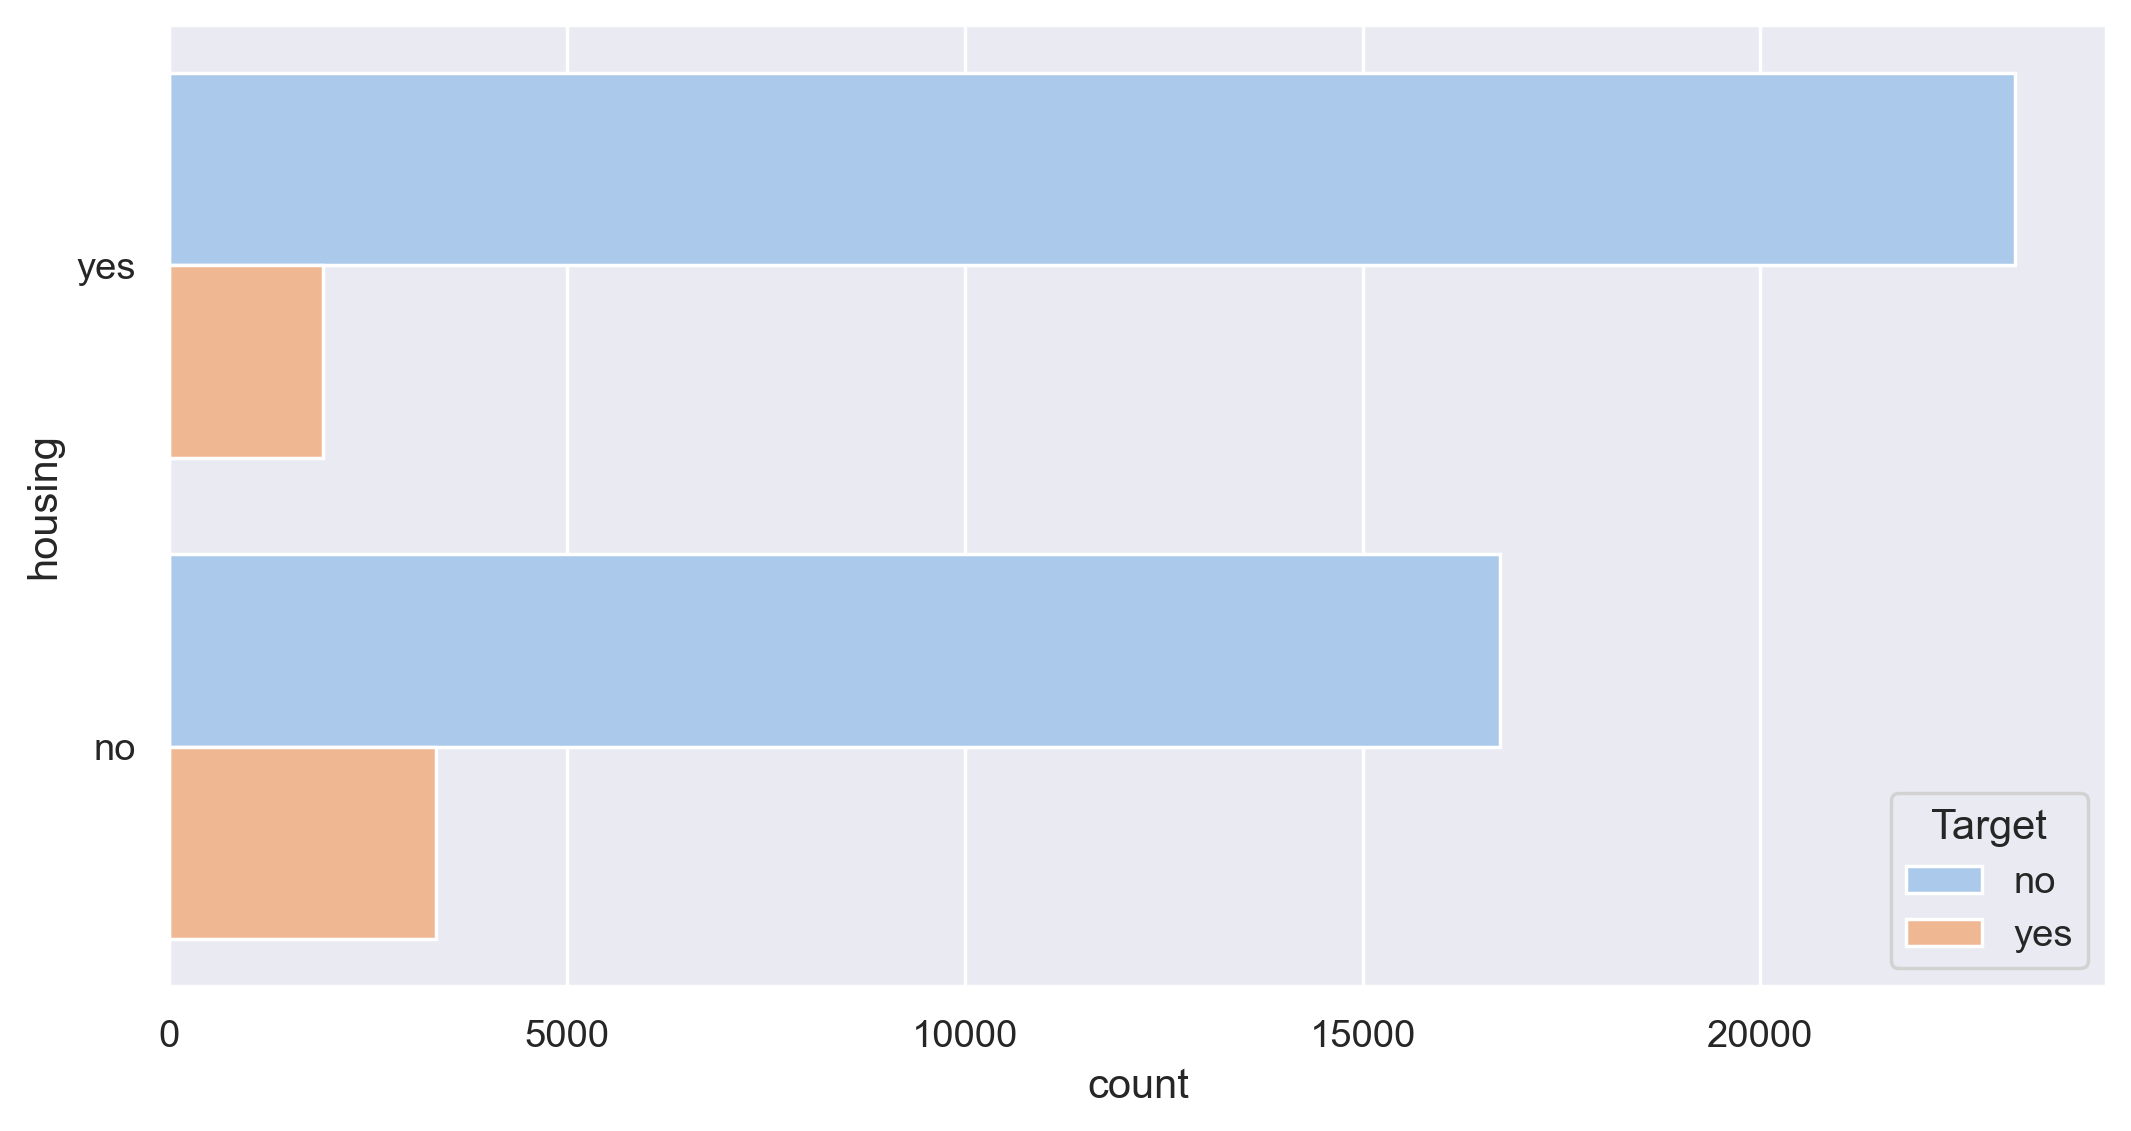

In [27]:
plot_count('housing')

> * #### Majority of clients with no housing loan are responded positively then who have housing loan.

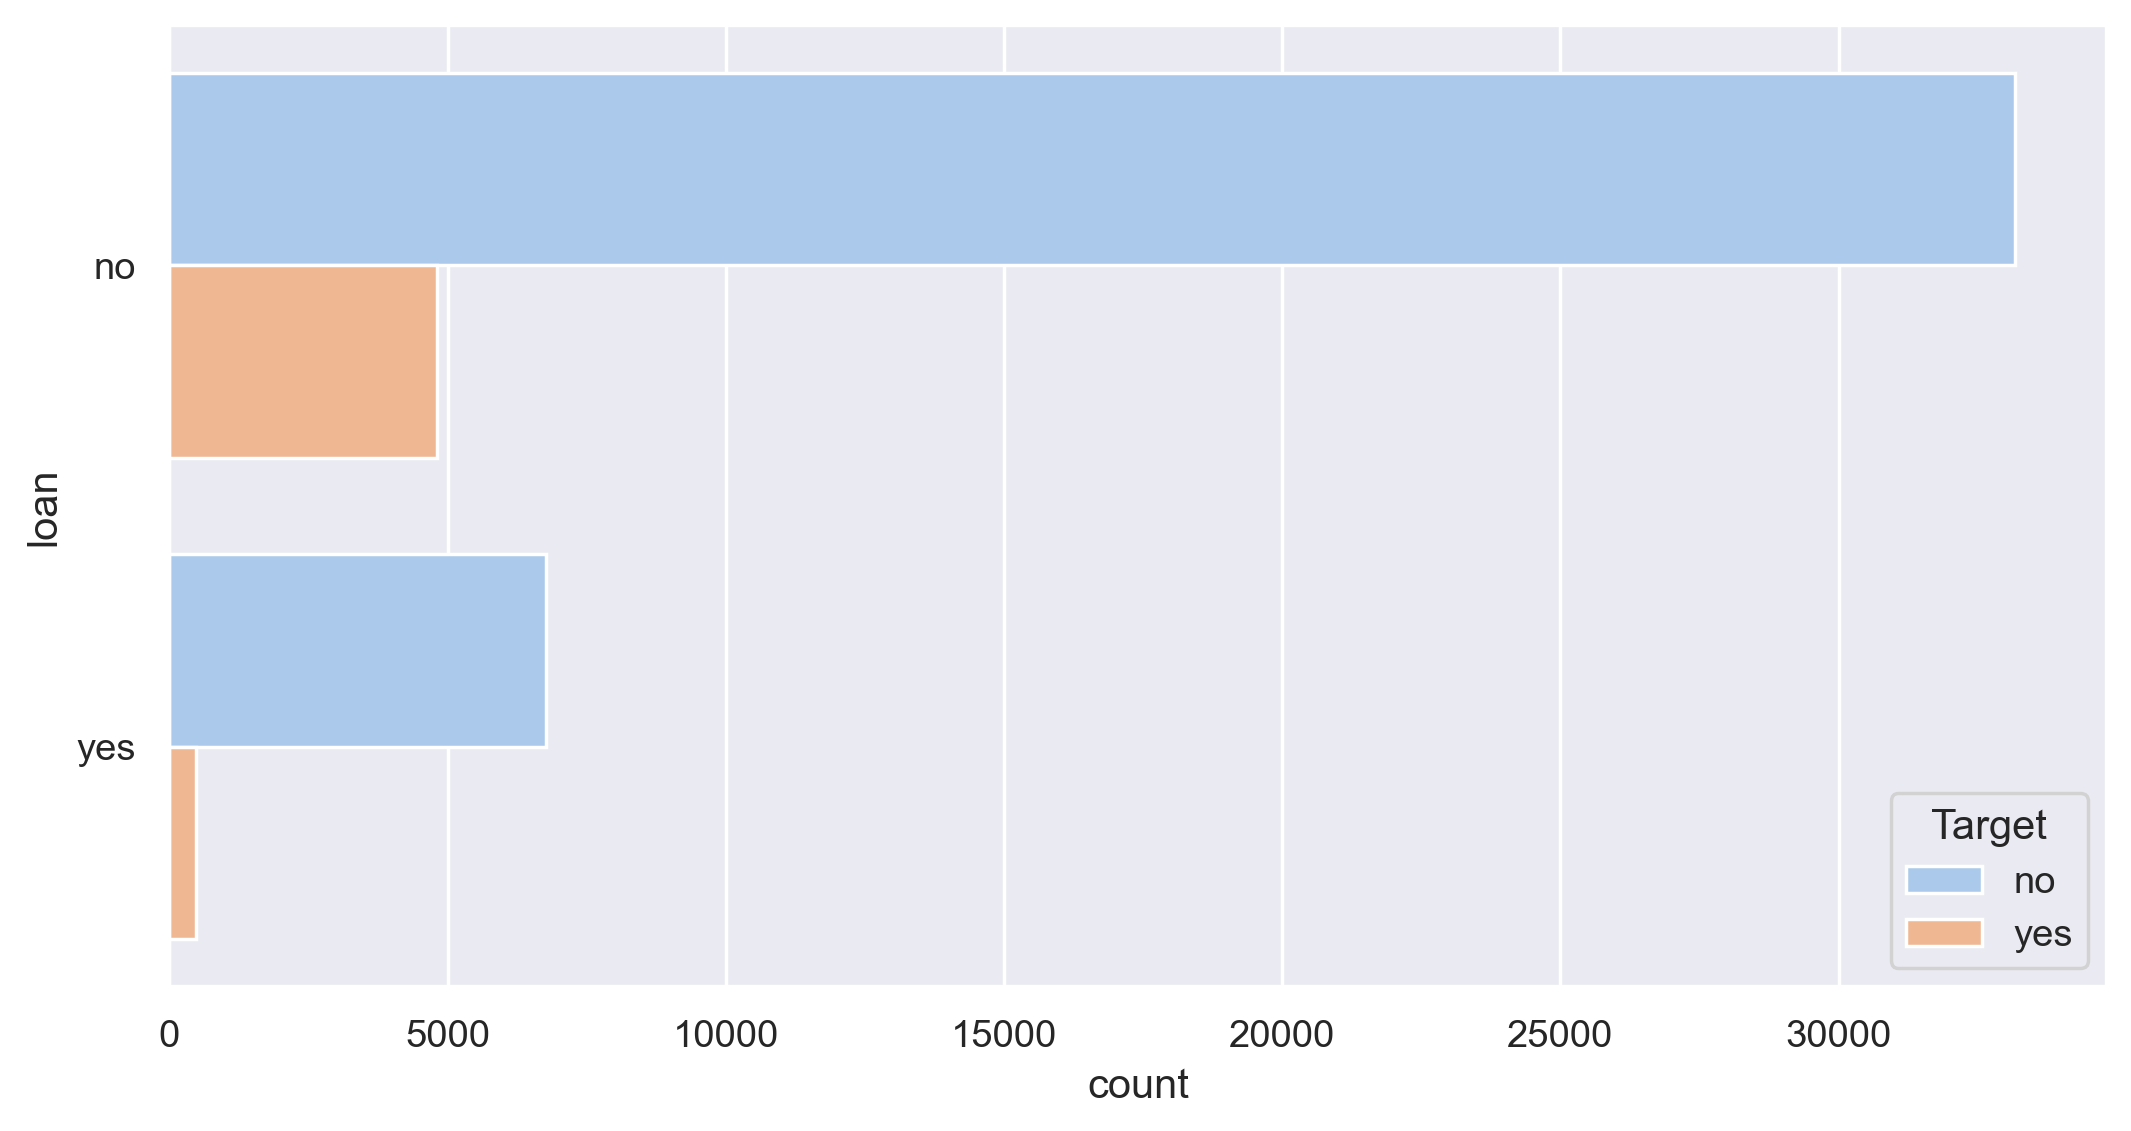

In [28]:
plot_count('loan') 

> * #### Clients with no personal loan contacted mostly than who have personal loans.

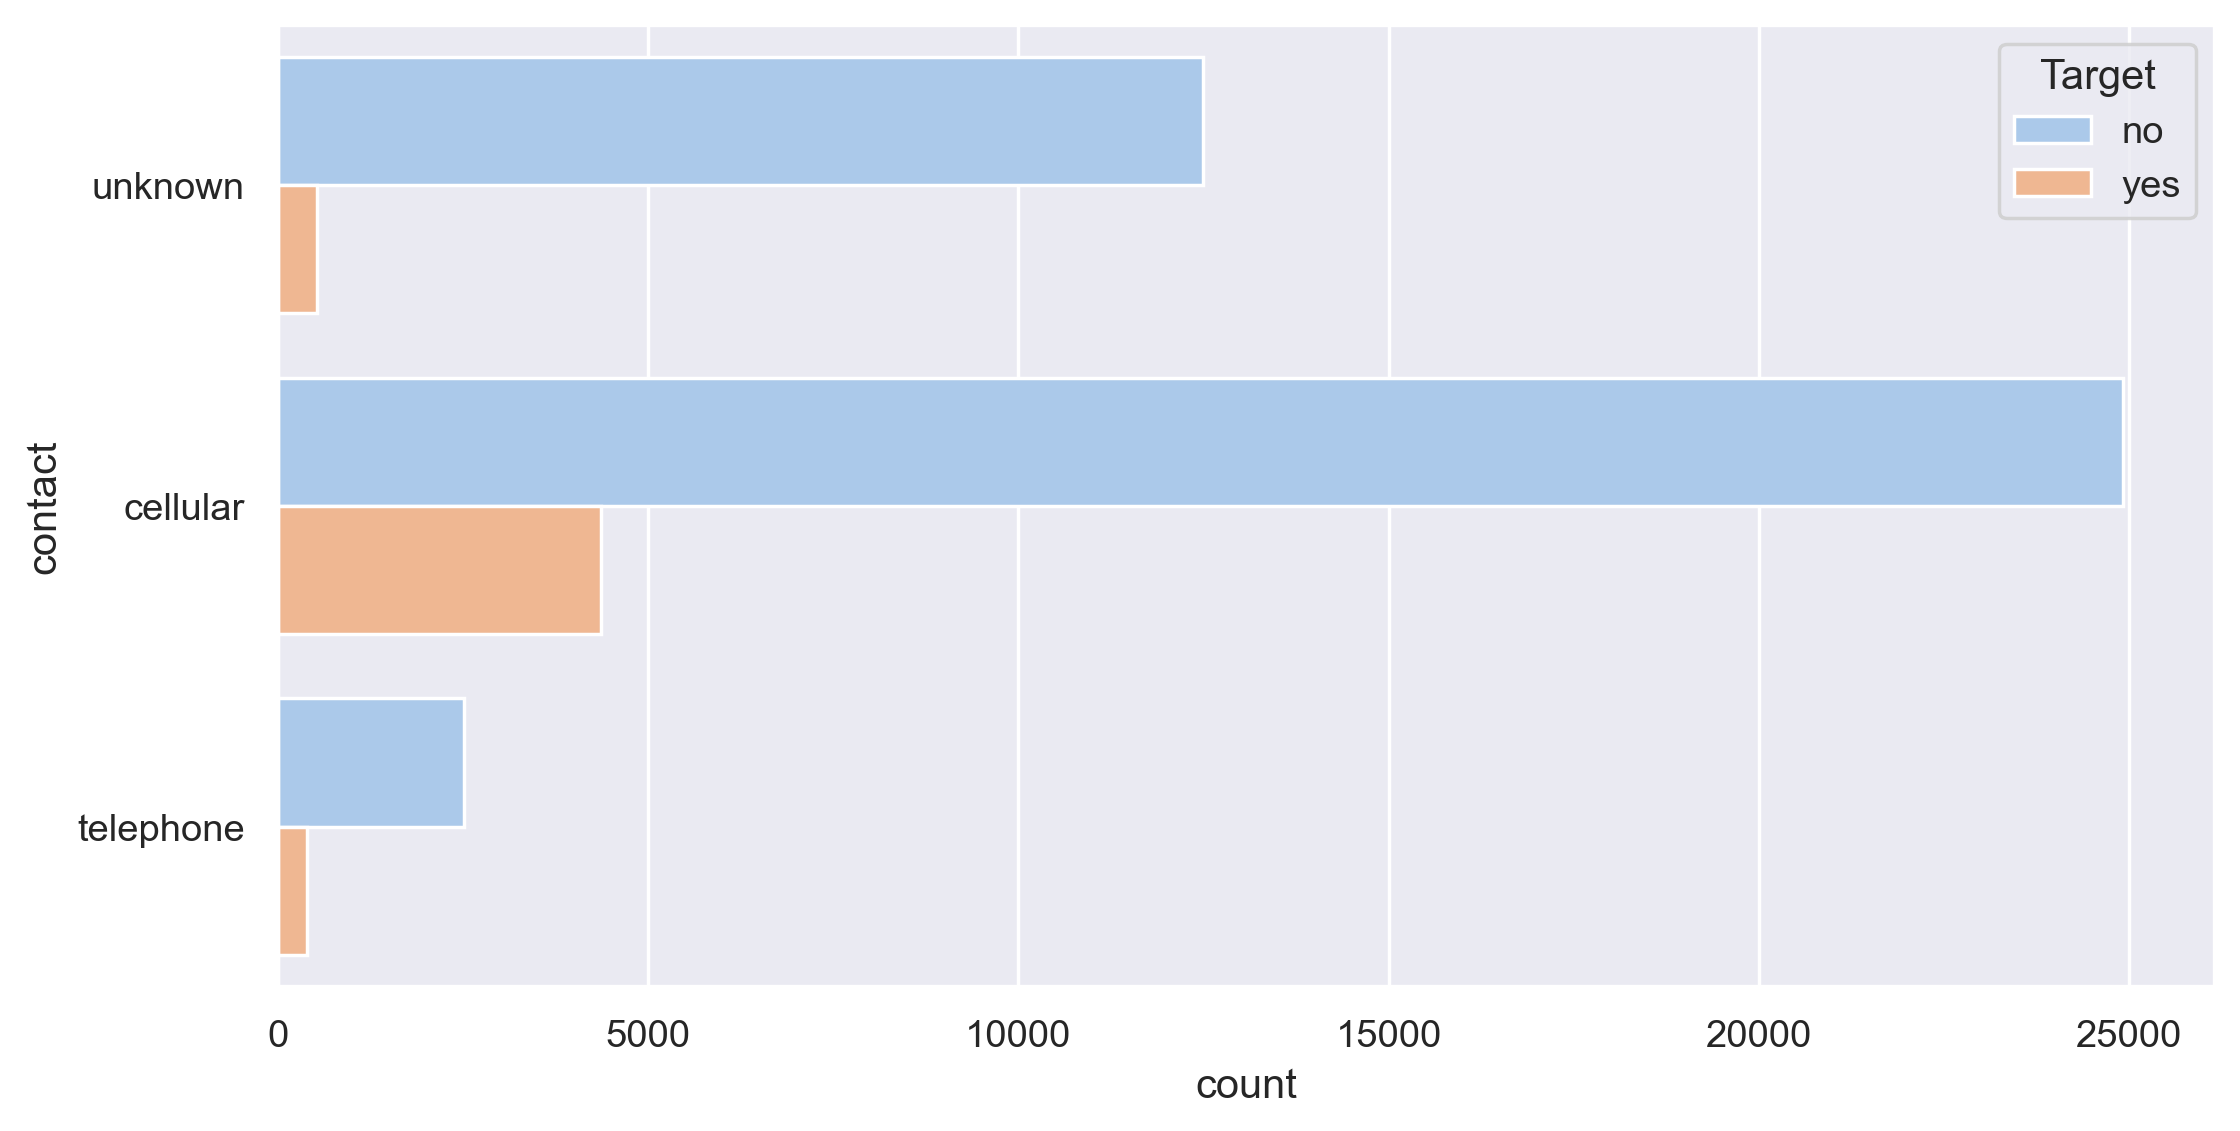

In [29]:
plot_count('contact')

> * #### Contact through "cellular" Category is more than other medium of contacts.

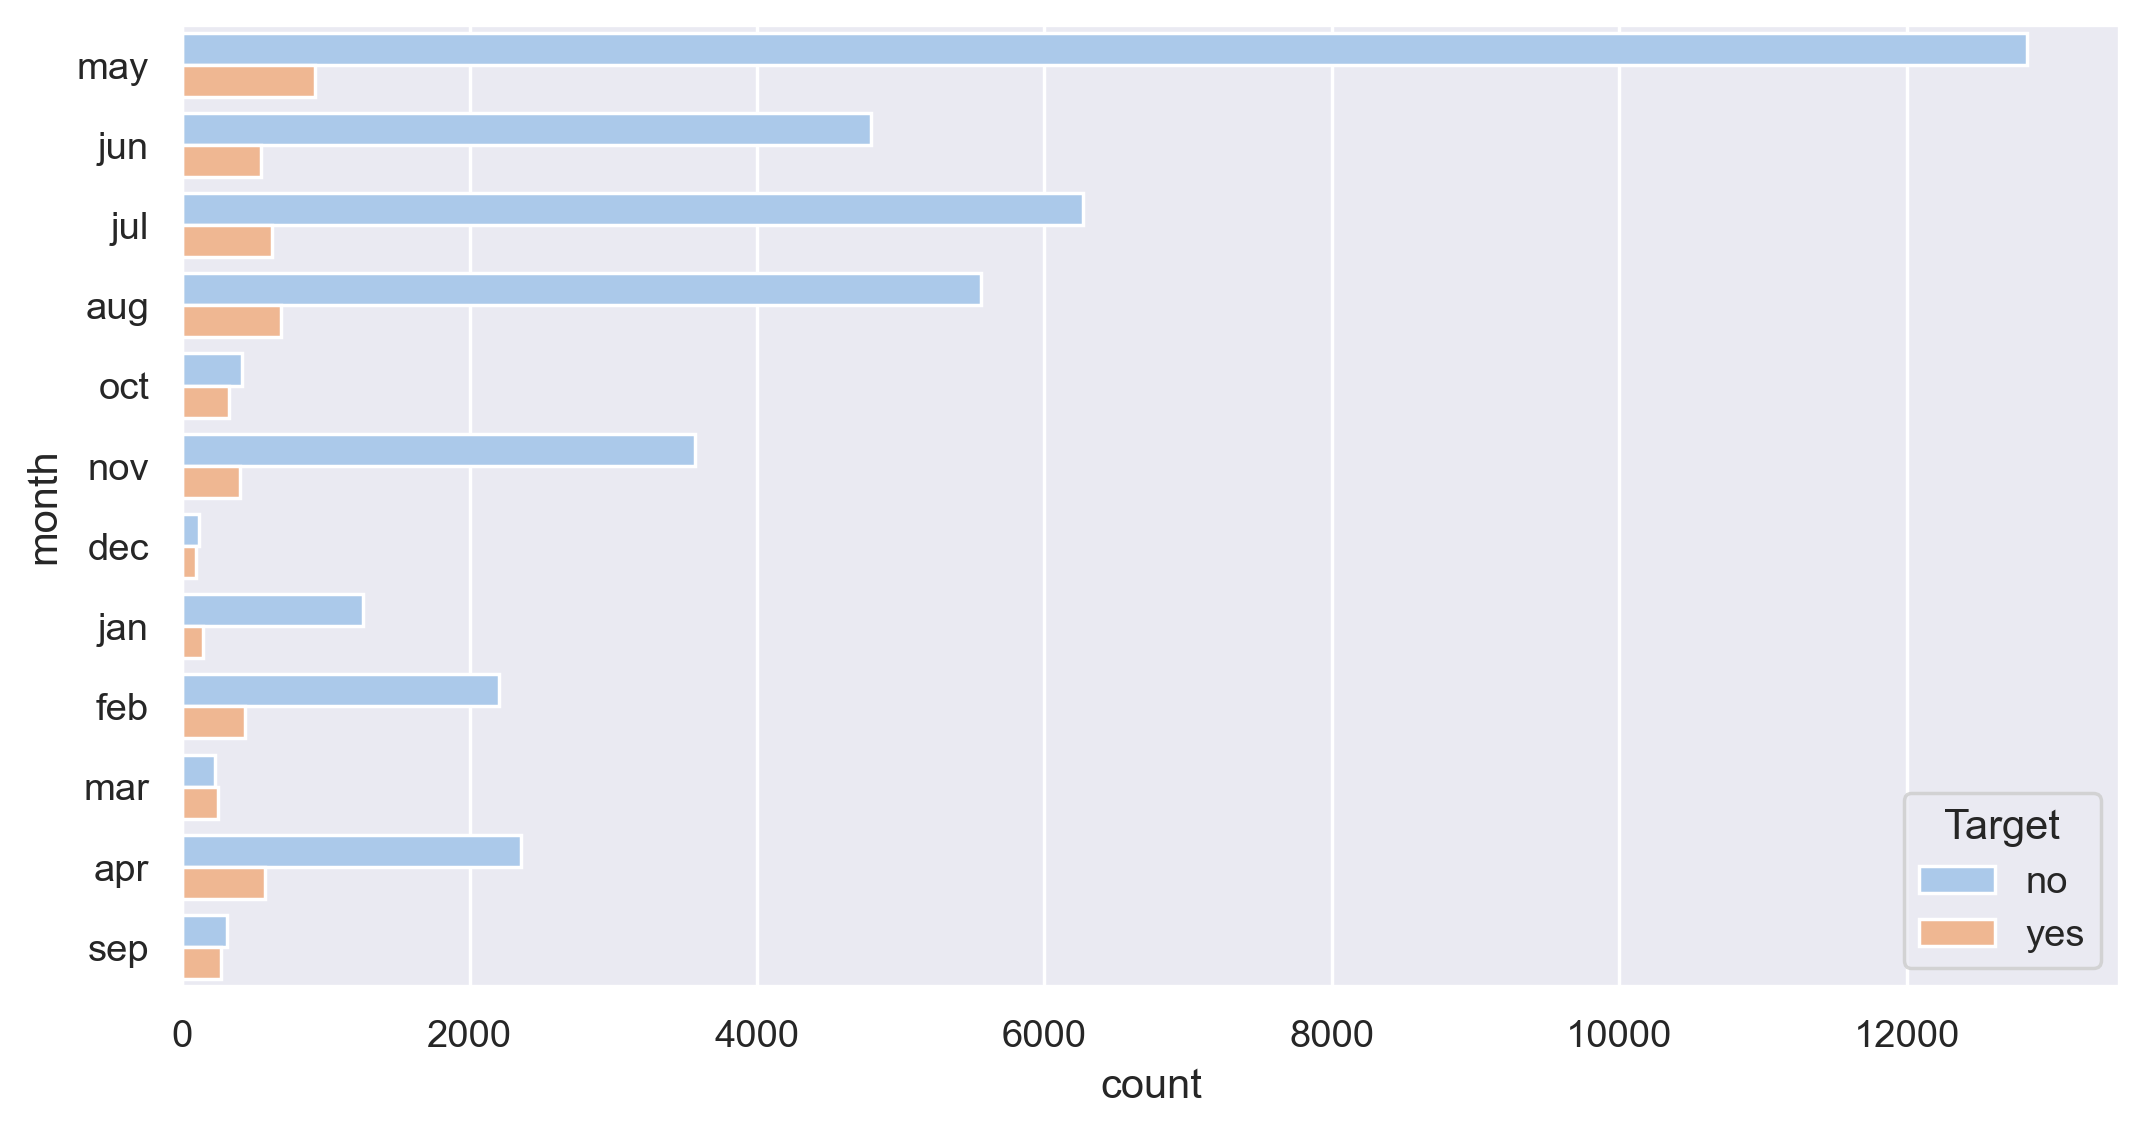

In [30]:
plot_count('month')

> * #### Contact rate in May is maximum but the success rate March, Sept, October is comparatively good.

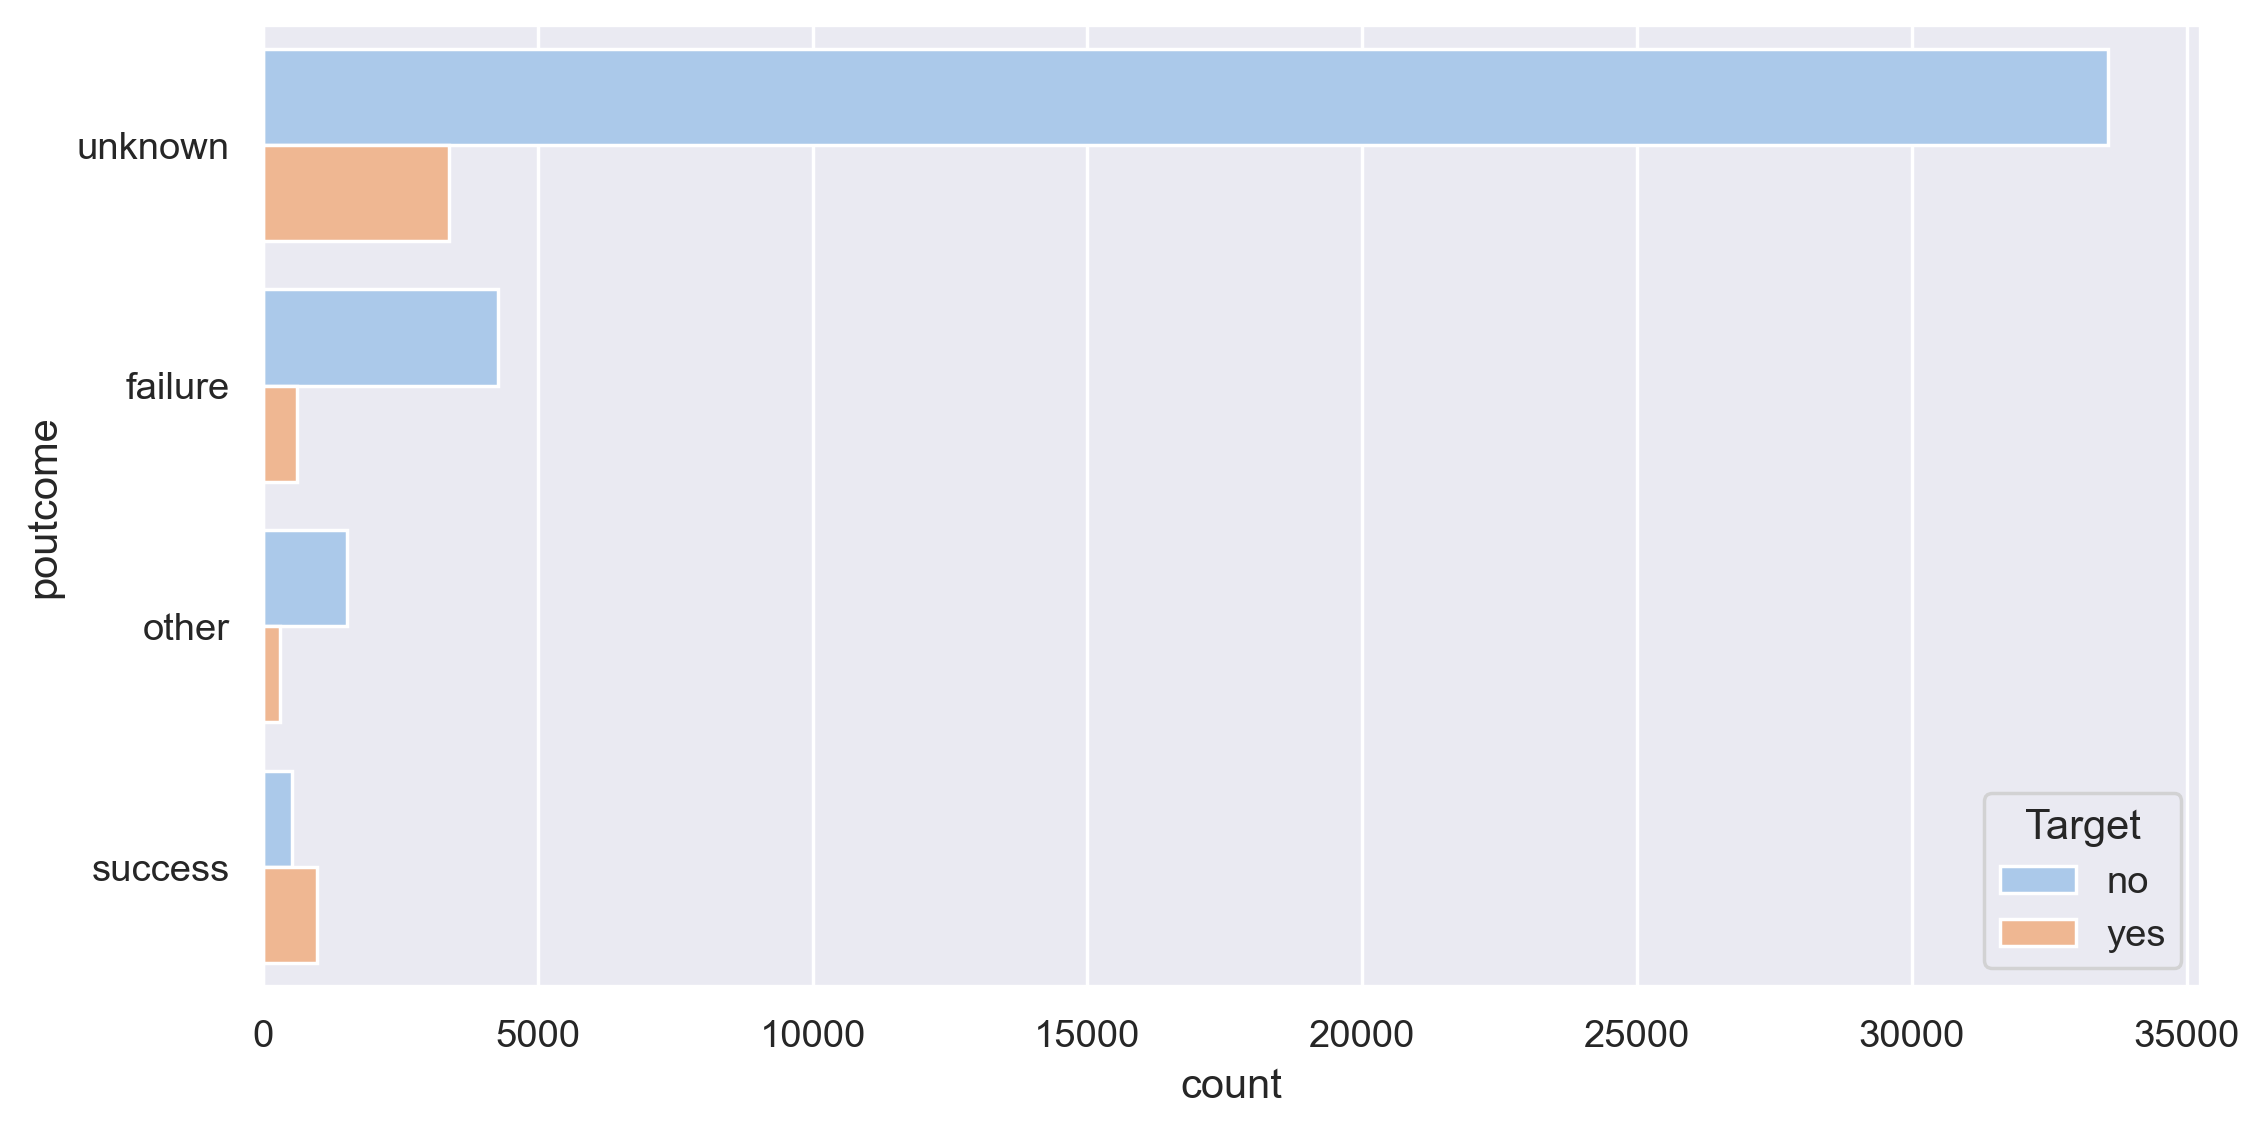

In [31]:
plot_count('poutcome')

> * #### Outcome of the previous marketing campaign is majorly unkown. 

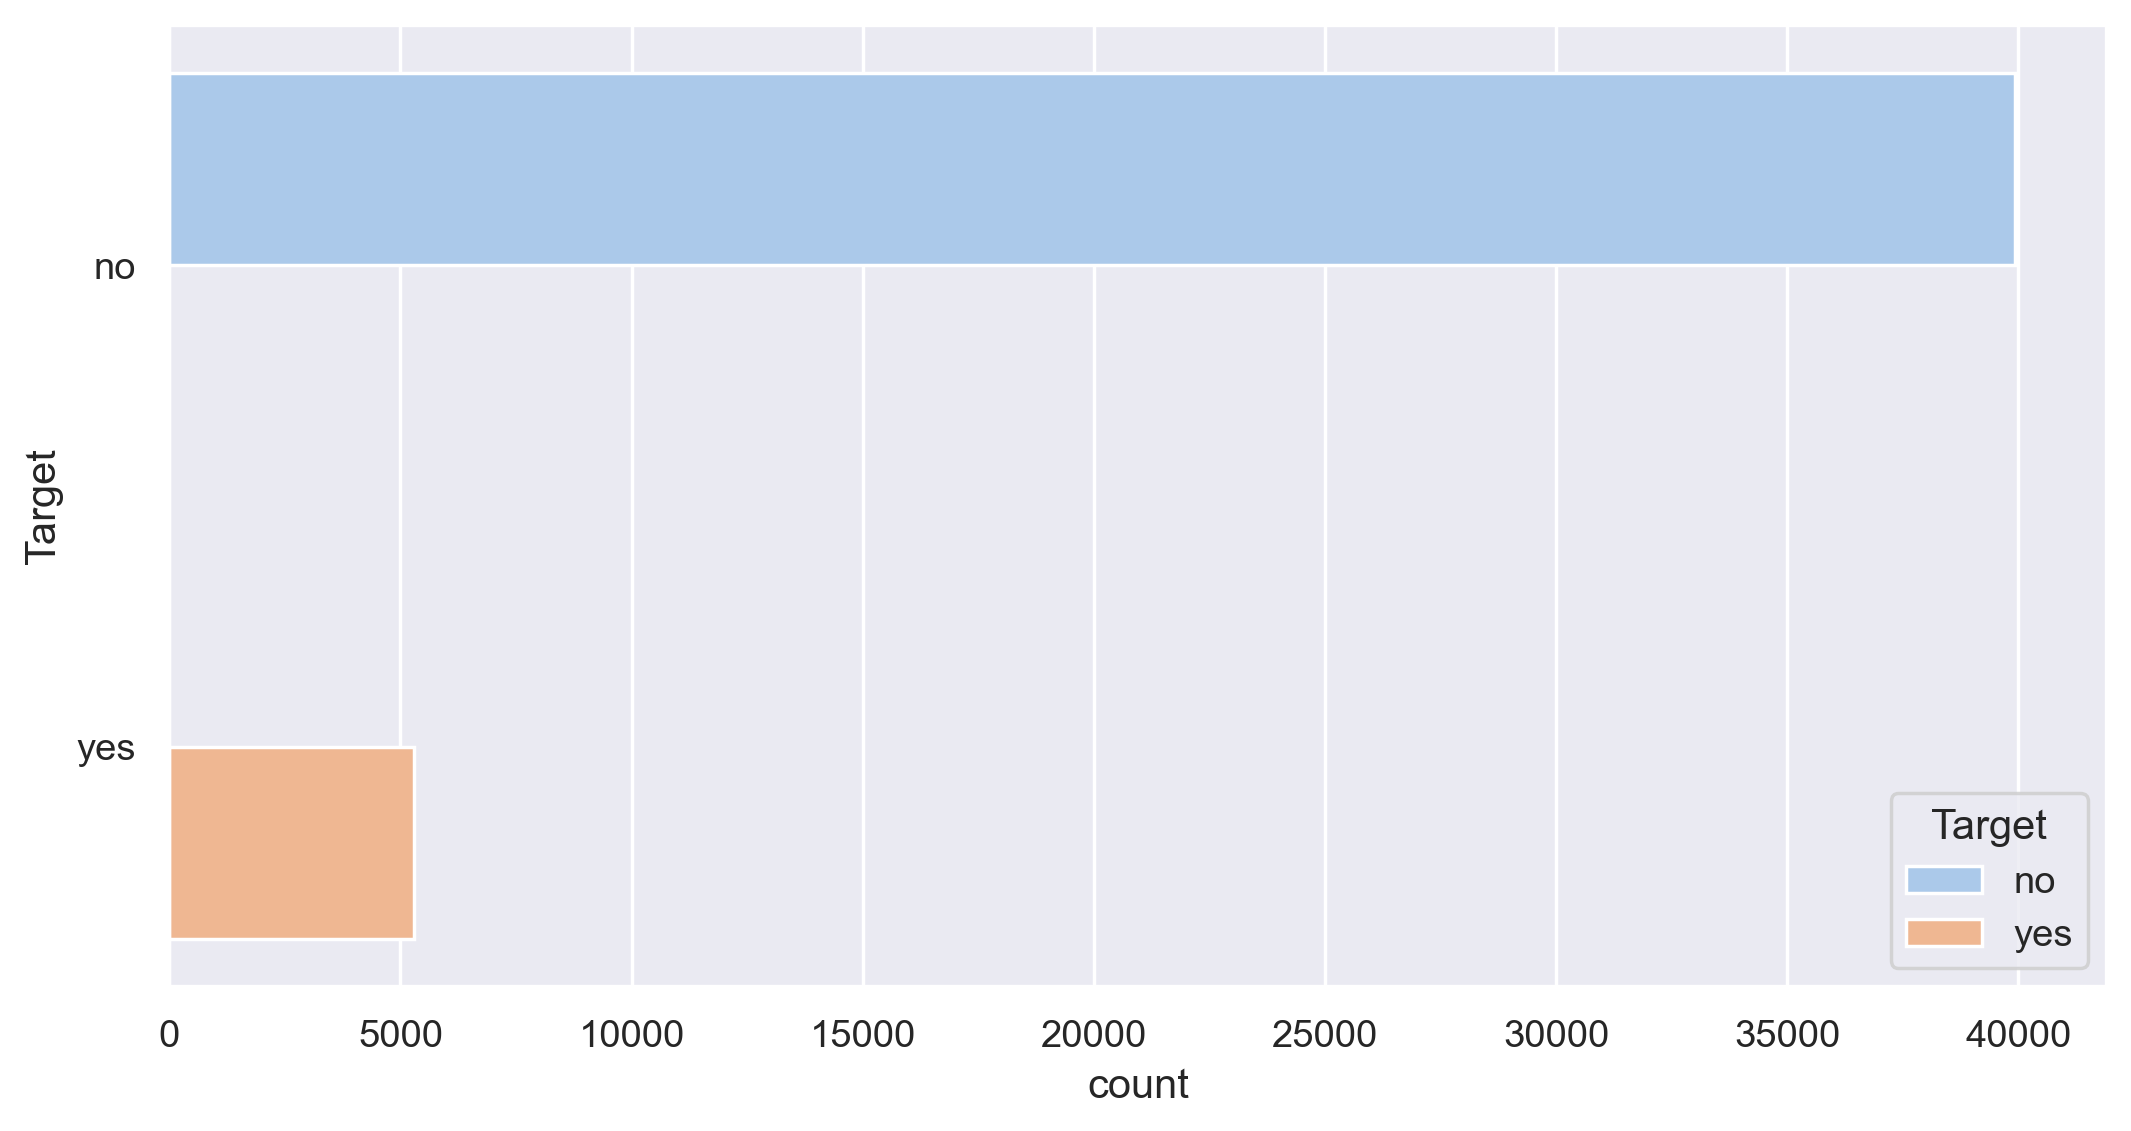

In [32]:
plot_count('Target')

> * #### Out of total 45211 clients only 11.69% client actually subscribed for term deposit. This means success rate is very low. So, prediction of positve client class becomes necessary to save time, energy and money.

***

* ### <font color = 'blue'> <u> DATA TRANSFORMATION </u>

* #### Here we have different types of Categorical data so we use different types of Encoding Techniques. 

* ##### <font color ='green'><u> Encoding Target Variable with Lable Encoder </u>

In [33]:
from sklearn import preprocessing

In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
df['Target'] = label_encoder.fit_transform(df['Target'])

In [36]:
df['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

* ##### <font color ='green'><u> Encoding Ordinal Categorical Variables with Ordinal Encoder </u>

* ##### Variables "default", "housing", "loan" have only two unique values i.e "yes" and "no" so we encode them with 1 and 0.

In [37]:
print(f'Unique values of "default" are:',df['default'].unique())
print(f'Unique values of "housing" are:',df['housing'].unique())
print(f'Unique values of "loan" are:',df['loan'].unique())

Unique values of "default" are: ['no' 'yes']
Unique values of "housing" are: ['yes' 'no']
Unique values of "loan" are: ['no' 'yes']


In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [39]:
df ['default'] = oe.fit_transform(df[['default']])
df ['housing'] = oe.fit_transform(df[['housing']])
df ['loan'] = oe.fit_transform(df[['loan']])

* ##### Variable "poutcome" i.e Outcome of previous campaign has 4 Unique Values, i.e. 'unknown', 'failure', 'other', 'success'.
* ##### We don't know what 'other' outcome actually mean. So we merge it with 'unknown' category.
* ##### And then we replace values 'success', 'failure' and 'unknown' with 1, 0, -1.

In [40]:
print(f'Unique values of "poutcome" are:',df['poutcome'].unique())

Unique values of "poutcome" are: ['unknown' 'failure' 'other' 'success']


In [41]:
df['poutcome'].replace('other','unknown',inplace=True)

In [42]:
df['poutcome'].replace('failure',0,inplace= True)
df['poutcome'].replace('success',1,inplace= True)
df['poutcome'].replace('unknown',-1,inplace= True)

In [43]:
df['poutcome'].unique()

array([-1,  0,  1], dtype=int64)

* ##### <font color ='green'><u> Encoding of Nominal Categorical Variables with panda's get_dummies function </u>

In [44]:
print(f'Unique values of "job" are:',df['job'].unique(),'=',df['job'].nunique())
print(f'Unique values of "marital" are:',df['marital'].unique(),'=',df['marital'].nunique())
print(f'Unique values of "education" are:',df['education'].unique(),'=',df['education'].nunique())
print(f'Unique values of "contact" are:',df['contact'].unique(),'=',df['contact'].nunique())
print(f'Unique values of "month" are:',df['month'].unique(),'=',df['month'].nunique())

Unique values of "job" are: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] = 12
Unique values of "marital" are: ['married' 'single' 'divorced'] = 3
Unique values of "education" are: ['tertiary' 'secondary' 'unknown' 'primary'] = 4
Unique values of "contact" are: ['unknown' 'cellular' 'telephone'] = 3
Unique values of "month" are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] = 12


In [45]:
df = pd.get_dummies(data = df, columns=['job','marital','education','contact','month'])

In [46]:
pd.set_option('display.max.columns',None)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0.0,2143,1.0,0.0,5,261,1,-1,0,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0.0,29,1.0,0.0,5,151,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0.0,2,1.0,1.0,5,76,1,-1,0,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0.0,1506,1.0,0.0,5,92,1,-1,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0.0,1,0.0,0.0,5,198,1,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


* ##### <font color ='green'><u> Let's Convert all data types in Integer format </u>

In [47]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [48]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep']] = df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep']].astype('int')

In [49]:
df.dtypes

age                    int32
default                int32
balance                int32
housing                int32
loan                   int32
day                    int32
duration               int32
campaign               int32
pdays                  int32
previous               int32
poutcome               int32
Target                 int32
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education_primary      int32
education_secondary    int32
education_tertiary     int32
education_unknown      int32
contact_cellular       int32
contact_telephone      int32
contact_unknown        int32
month_apr     

***

* ### <font color = 'blue'> <u> SPLITTING DATA INTO TRAIN AND TEST SET</u>

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Independent Variables(x):
x = df.drop(columns=['Target'])
# Dependent Variable(y):
y = df['Target']

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=42)

In [53]:
print(f'X-train data shape: ', xtrain.shape)
print(f'X-test data shape: ', xtest.shape)
print(f'Y-train data shape: ', ytrain.shape) 
print(f'Y-test data shape: ', ytest.shape)

X-train data shape:  (33908, 45)
X-test data shape:  (11303, 45)
Y-train data shape:  (33908,)
Y-test data shape:  (11303,)


***

* ### <font color = 'blue'> <u> MODEL BUILDING</u>

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lg = LogisticRegression()

In [56]:
# Train the model:
lg.fit(xtrain,ytrain)

# Prediction :
ypred = lg.predict(xtest)

___

* ### <font color = 'blue'> <u> MODEL EVALUATION</u>

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9950
           1       0.63      0.27      0.37      1353

    accuracy                           0.89     11303
   macro avg       0.77      0.62      0.66     11303
weighted avg       0.87      0.89      0.87     11303



In [59]:
confusion_matrix(ytest,ypred)

array([[9733,  217],
       [ 991,  362]], dtype=int64)

Text(231.62500000000003, 0.5, 'Actual Values')

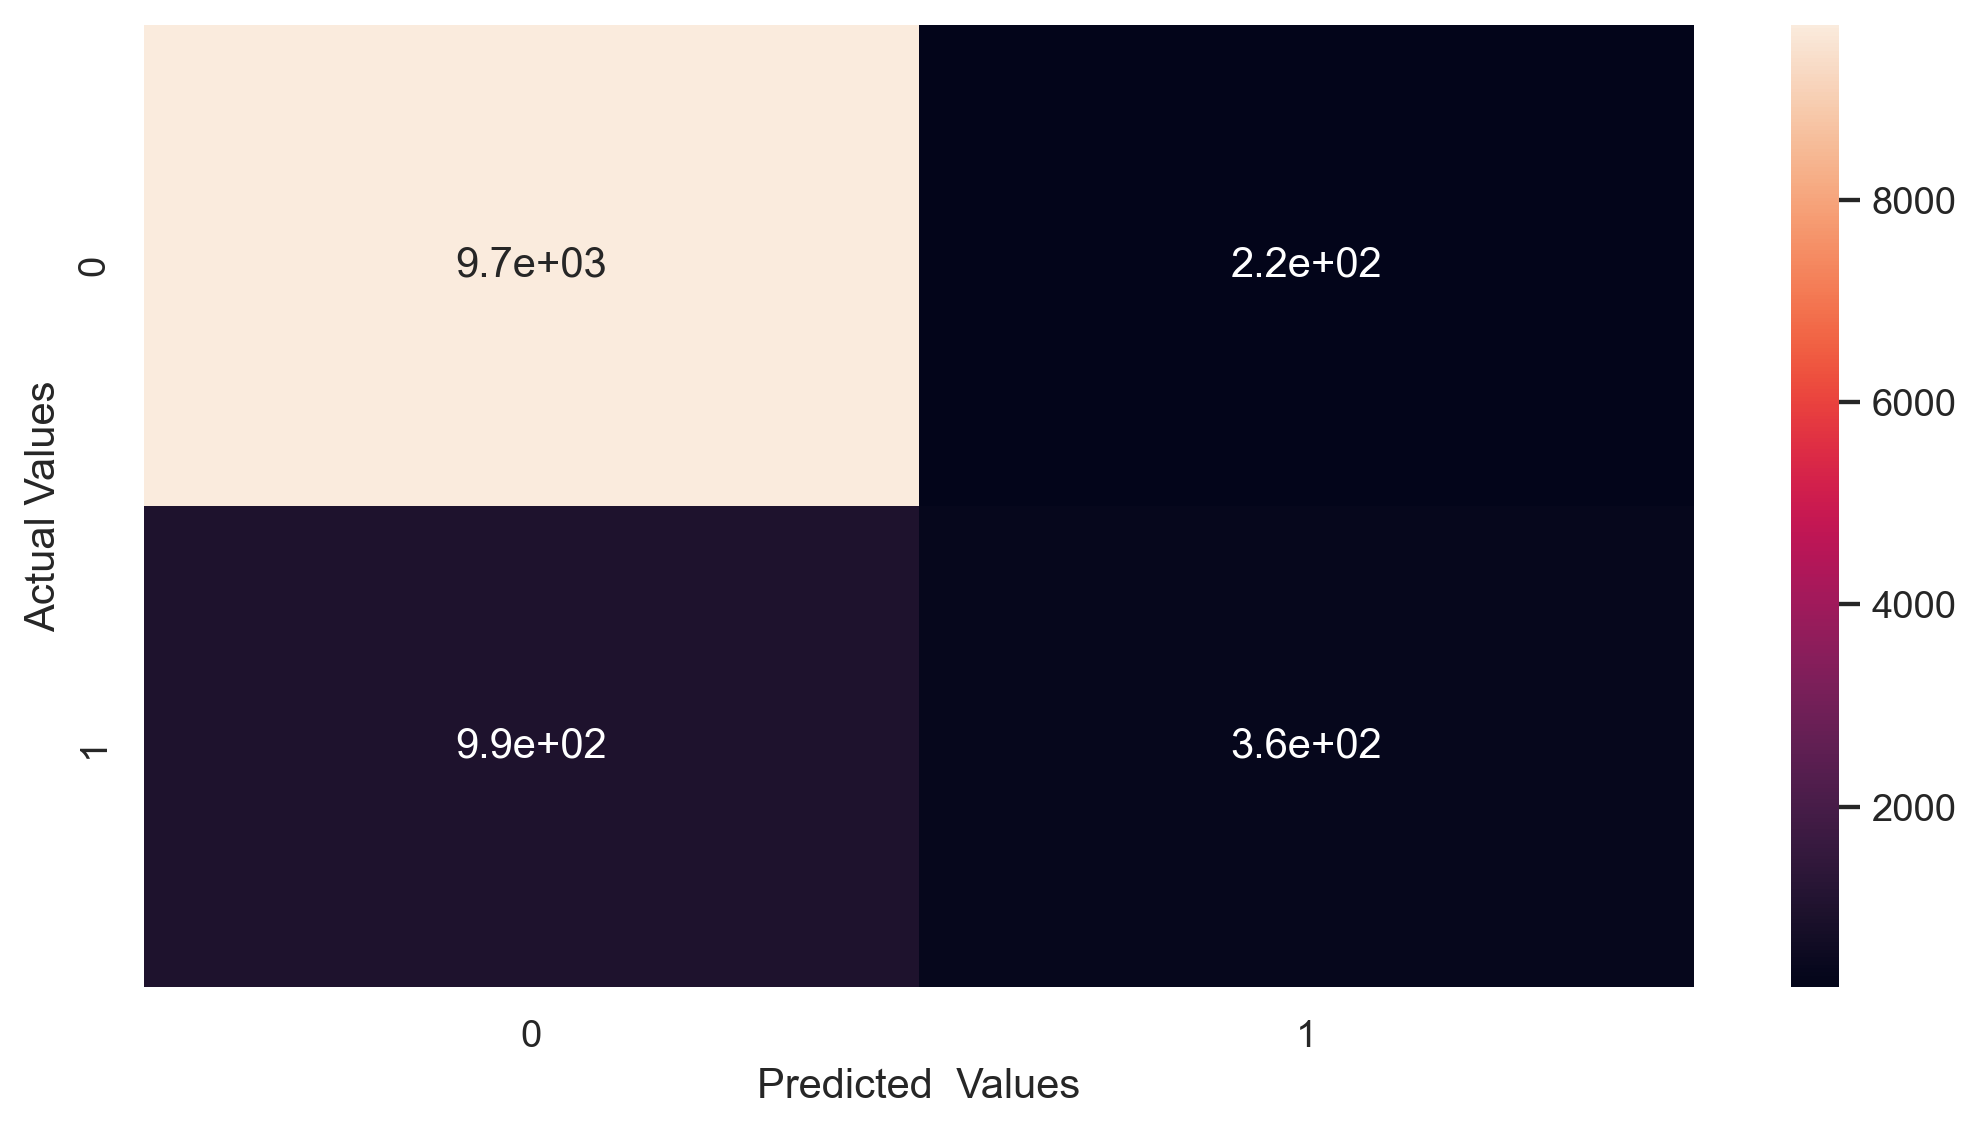

In [60]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Predicted  Values')
plt.ylabel('Actual Values')

> * #### We got 89% accuracy. But recall value is very low i.e. 0.27. This implies Out of actual total subscribed clients our model is able predict 27% subscribed clients correctly. 
> * #### Here out of 11303 test data there are 1353 are actual positive values out of which only 362 are predicted correctly(True Positive)
> * #### To increse the profit of bank we should not neglect the potential client who will subscribe the term deposit.
> * #### So here we want to predict subcribed clients with maximum accuracy (i.e. True Positive rate should be high and Falsely Negative rate should be low) 
> * #### False Negative rate increased by reducing the default threshold value(0.5). 
> * #### But as we try to reduce threshold value False Postive rate goes on increasing. So, we have to consider accuray of model also while reducing the default threshold value.

___

* ### <font color = 'blue'> <u> THRESHOLD SELECTION </u>

In [61]:
# Getting probabilities for predition of negative and positive classes for each record.
proba = lg.predict_proba(xtest)
proba

array([[0.98177942, 0.01822058],
       [0.96758413, 0.03241587],
       [0.85598707, 0.14401293],
       ...,
       [0.88940517, 0.11059483],
       [0.9191549 , 0.0808451 ],
       [0.61814843, 0.38185157]])

In [62]:
# As our focus is on positive class we select probabilities for 1's only, i.e. column 2.
proba_1 = lg.predict_proba(xtest)[:,1]
proba_1

array([0.01822058, 0.03241587, 0.14401293, ..., 0.11059483, 0.0808451 ,
       0.38185157])

* ##### <font color ='green'><u> Let's Plot ROC-AUC (Receiver operating characteristic) curve </u>

    - #### ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
    - #### The ROC curve is plotted with TPR (True Positive Rate) against the FPR(False Positive Rate).
  

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [64]:
auc = roc_auc_score(ytest,proba_1)
print(f' Area Under the Curve(AUC) Value is =',auc )

 Area Under the Curve(AUC) Value is = 0.8570237737096421


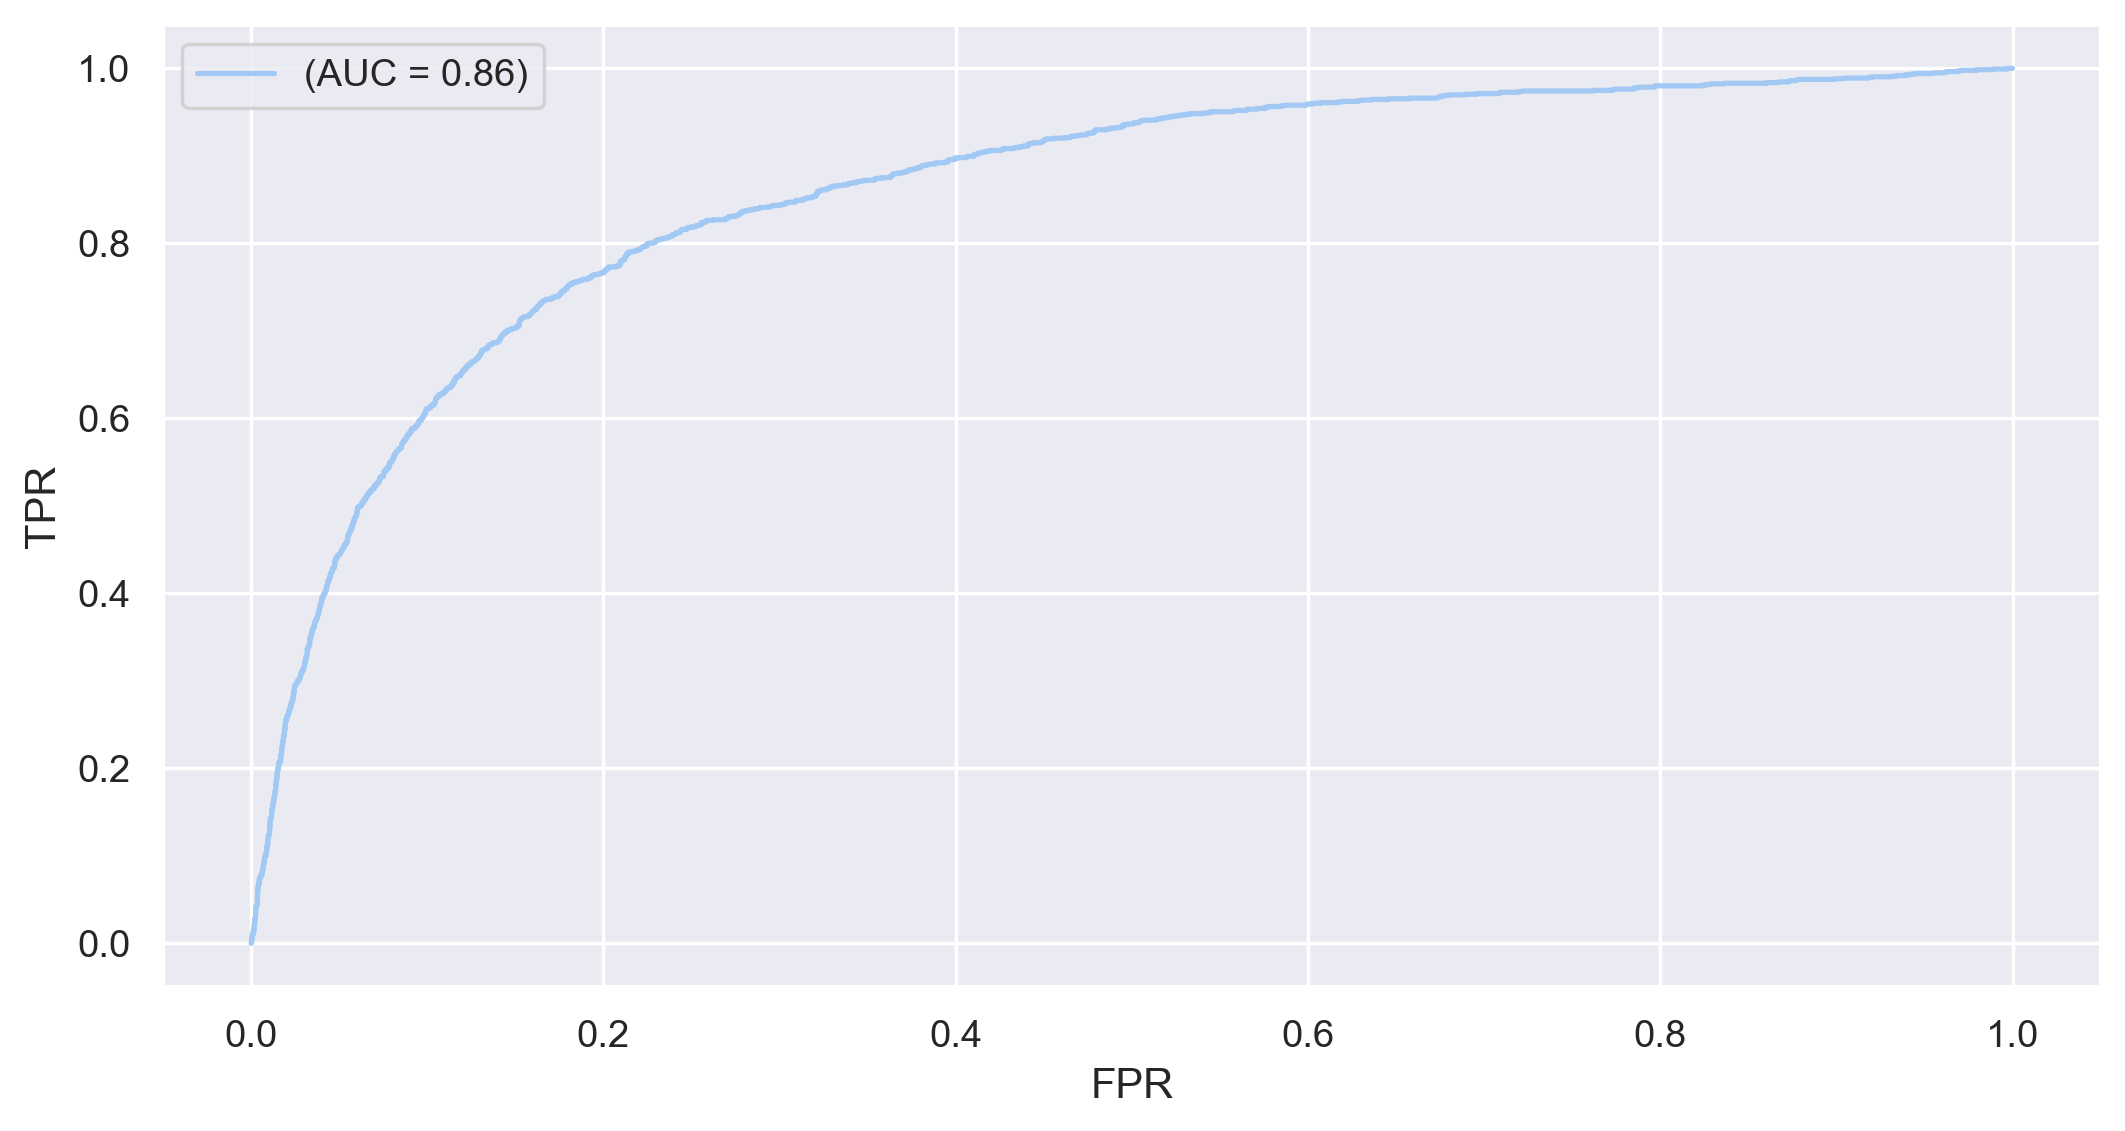

In [65]:
FPR,TPR, Threshold = roc_curve(ytest,proba_1)

plt.plot(FPR,TPR,label = '(AUC = %0.2f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

> * #### As we see here we got good value of AUC i.e. 0.86. 
> * #### An excellent model has AUC near to the 1 which means it has a good measure of separability. 

In [66]:
# New Theeshold values given by Model randomly as follows:
Threshold

array([1.99989036e+00, 9.99890360e-01, 9.98683238e-01, ...,
       4.89430995e-06, 4.61763716e-06, 2.31244565e-09])

In [67]:
# As we have to select new threshold with good amount of accuracy we compute accuracy for each threshold:

accuracy = []

for i in Threshold:
    ypred = np.where(proba_1>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(Threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [68]:
# Arrange them in decending order of Accuracy with new threshould value.

final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
312,4.714242e-01,0.893745
311,4.722958e-01,0.893745
310,4.732725e-01,0.893657
251,5.222304e-01,0.893480
313,4.662818e-01,0.893480
...,...,...
1757,1.981905e-04,0.129523
1758,1.957228e-04,0.129435
1759,4.894310e-06,0.122268
1760,4.617637e-06,0.122180


> * #### New Threshold value 0.4714242 with accuracy 0.893745

In [69]:
# Let's Change defalut threshold value to new threshould (0.47)
from sklearn.preprocessing import binarize 

In [70]:
y_new = binarize([proba_1], threshold= 0.4714242)[0] 
y_new

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
print(classification_report(ytest,y_new))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9950
           1       0.62      0.29      0.40      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.63      0.67     11303
weighted avg       0.88      0.89      0.88     11303



> * #### After new threshold selection we got recall value 0.29, which is just 2% improvement than previous value.
> * #### But the Accuracy of model is good enough. This is due to Model predict negative class much efficiently, recall value for 0 class is 0.98.

* ### <font color = 'blue'> <u> CONCLUSION </u>
 * #### As we are interested in Predicting Subscription rate with high accuracy than non subscribed clients for term deposit, we can't say this Model best for Predicting Subscribers with maximum rate.
 * #### This happens due to our raw data which has maximum number of non subscribed clients than subscribed clients.
 * #### We seen in Data Visualisation Out of total 45211 clients only 11.69% subscribed for term deposit actully. This causes our class of interest i.e. positive class to become minority class and hamper our model to detect subcribers correctly. 
 * #### We also observed that there are many columns with category "unkown" implies lack of efficient data for the Good Model Building.

<br>
<br>
<br>

> # <u>END</u>
___